# Hands-On NLP
## Class 1

### Ben Kabongo Buzangu
**Université Paris-Saclay, M1 DS**

- Getting some data

- Understanding a text corpus

  - Unicode

  - Character distributions

- The notion of words

  - Word distributions

  - Types and tokens

  - Text complexity

In [1]:
import re
import unicodedata
from collections import Counter
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [2]:
tqdm.pandas()

nltk.download("punkt")

%config InlineBackend.figure_format="retina"  # For high DPI display

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option('display.precision', 2)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benkabongo25/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
%config InlineBackend.figure_format="retina"  # For high DPI display

# %load_ext blackcellmagic

In [4]:
DATA = Path("data")

TEXT_P = DATA / "texts"

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps

In [5]:
TEXT_P.mkdir(exist_ok=True)

# Getting some data

- If you have already downloaded the preprocessed "texts" folder, skip this, if not uncomment

- If you don't know how to use *git*, *conda* or *pip* inside of the notebook, learn it *now*

In [6]:
# !git clone https://github.com/EleutherAI/stackexchange_dataset/
# # %cd stackexchange_dataset
# # %pwd
# # !pip install -r requirements.txt

# !conda create -n honlp python=3.9
# !conda activate honlp
# !conda config --env --add channels conda-forge\n\n
# !conda update --all
# !conda install ipykernel pandas seaborn nltk ipywidgets
# !conda install bs4 lxml py7zr tqdm jsonlines zstandard ujson requests wget
# !pip install lm-dataformat
# !pip check

In [7]:
# !python stackexchange_dataset/main.py --names \
#     mythology.stackexchange,woodworking.stackexchange,woodworking.stackexchange,
#     robotics.stackexchange,hsm.stackexchange,health.stackexchange,
#     portuguese.stackexchange

In [8]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n..."
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic..."


In [9]:
for corpus, text in corpora.items():
    print(f"*** {corpus} ***")
    print(text[:65])

*** mythology ***
Q:

Can anyone identify what Chinese mythology creature this is?

*** woodworking ***
Q:

Glue-up for butcher block-style countertop

Background
I am w
*** robotics ***
Q:

How is this torque value arrived?

I'm going through this per
*** hsm ***
Q:

When and why did people stopped using "natural philosophy" te
*** health ***
Q:

Help reading an eyeglass prescription: What does "PL" or "PC"
*** portuguese ***
Q:

Qual a origem da expressão "o fim da picada"?

Se, em geral, 


# Visualizing the corpus

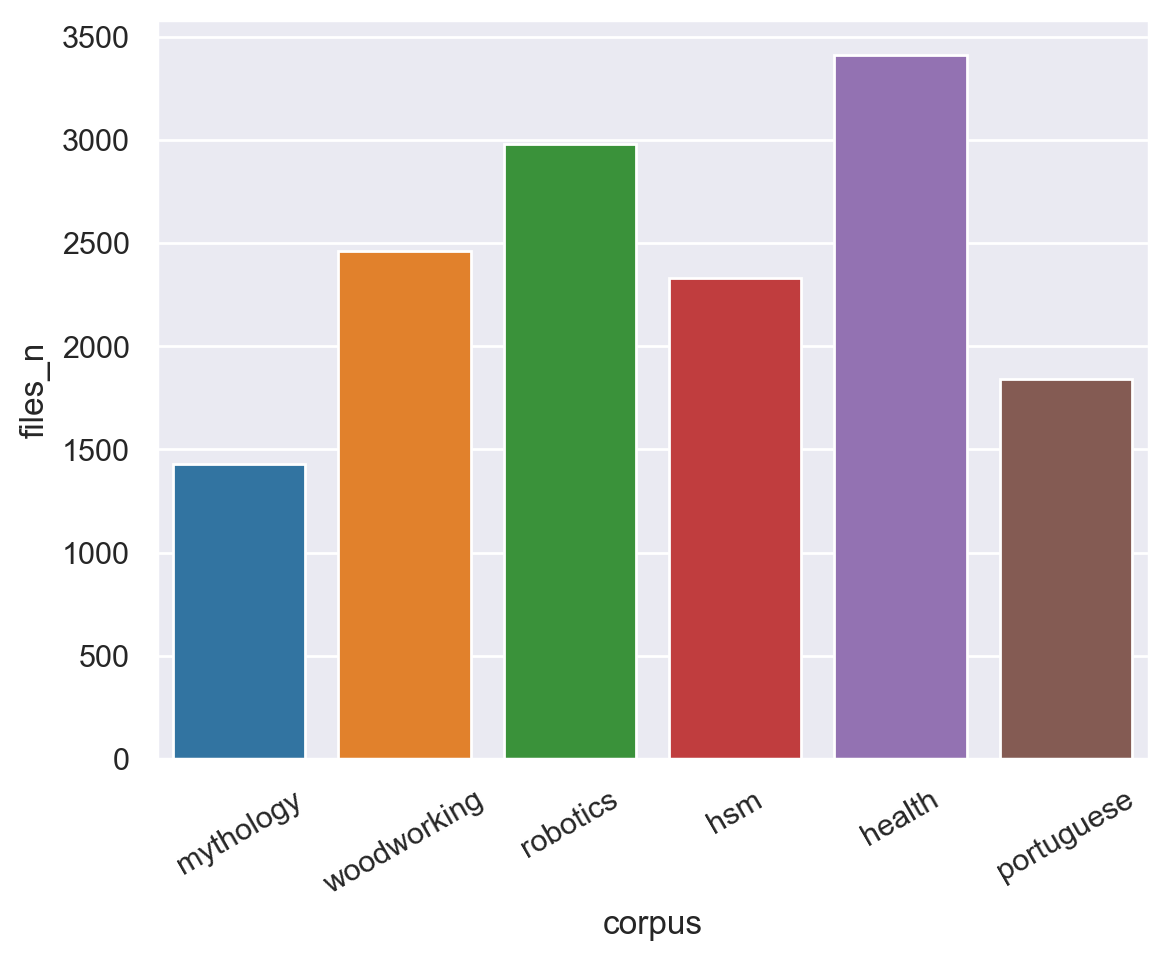

In [10]:
sns.barplot(x=df.index, y="files_n", data=df)
plt.xticks(rotation=30)
plt.show()

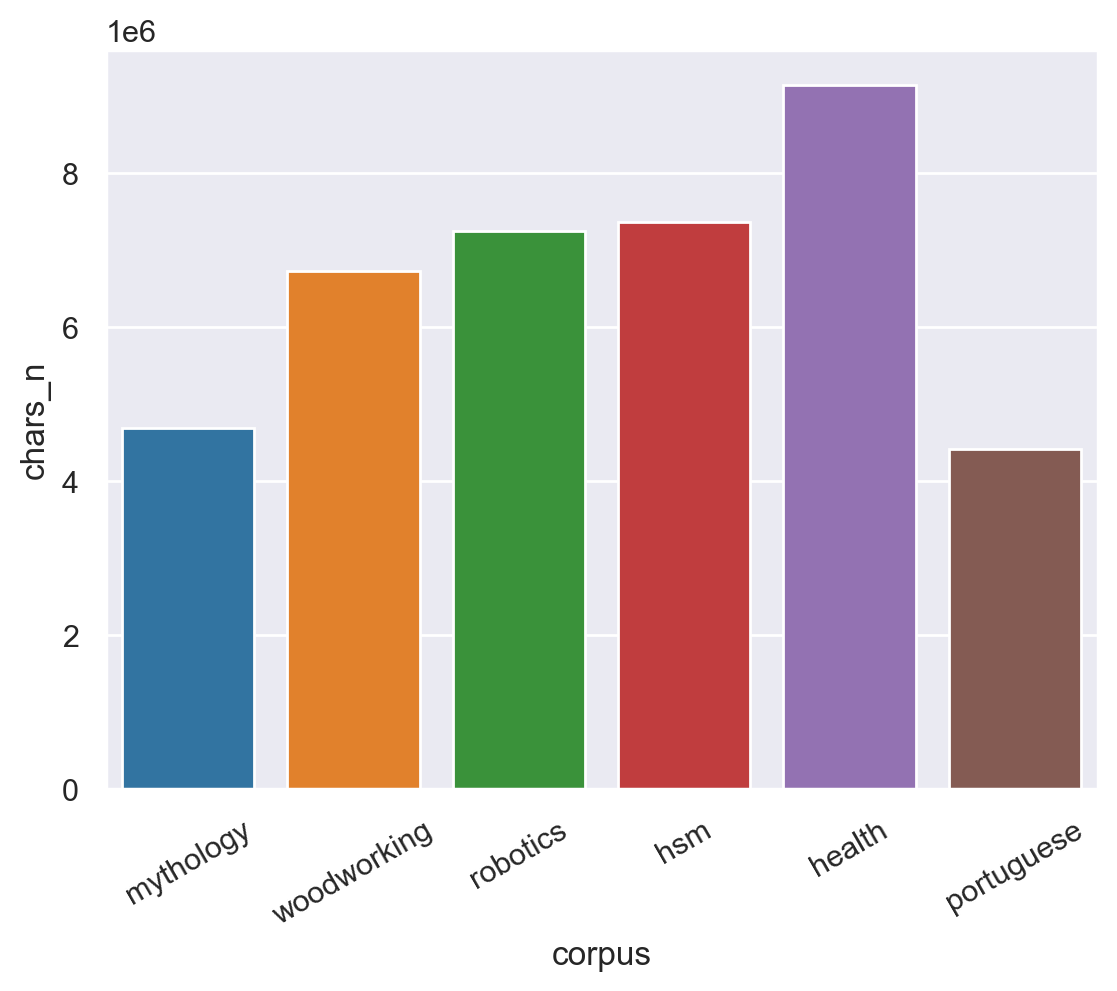

In [11]:
sns.barplot(x=df.index, y="chars_n", data=df)
plt.xticks(rotation=30)
plt.show()

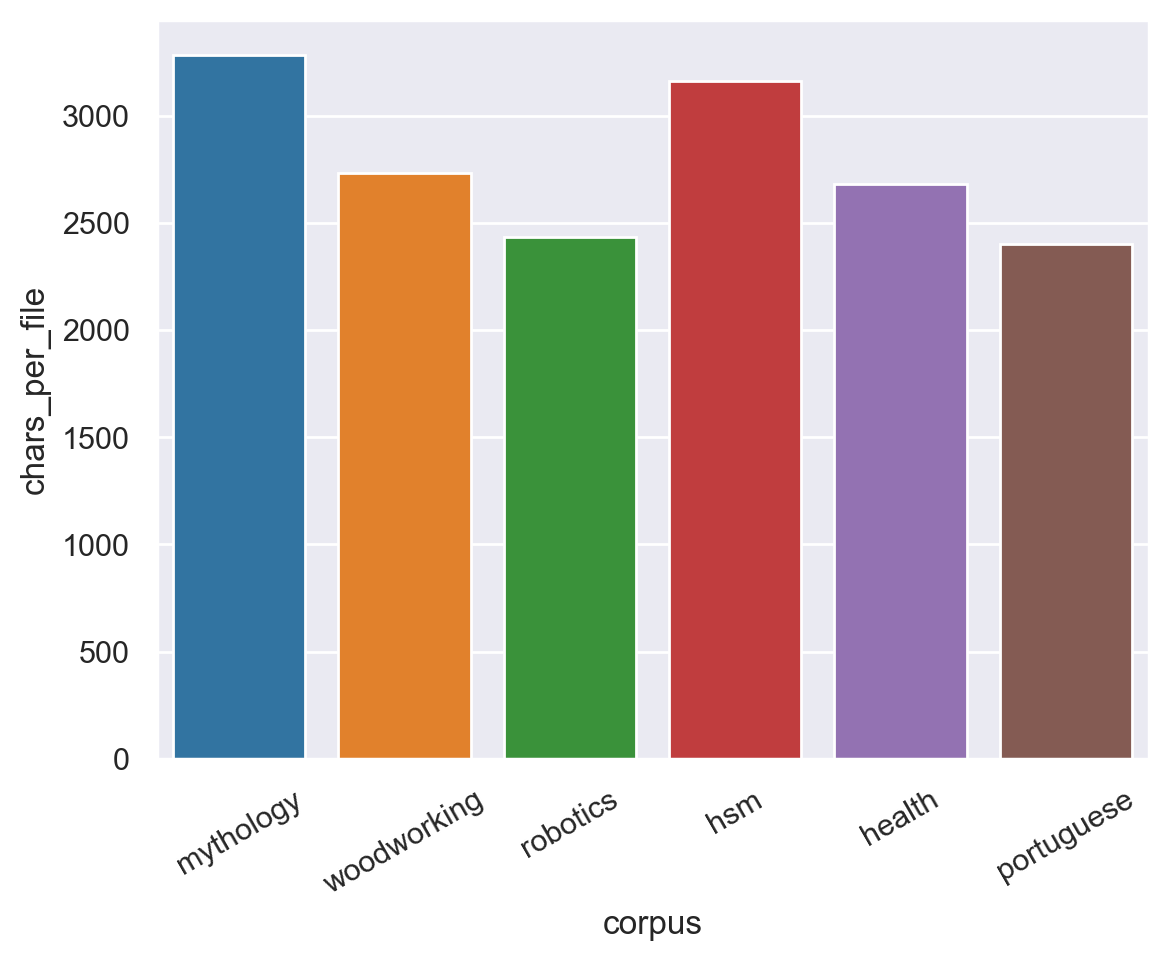

In [12]:
df["chars_per_file"] = df.chars_n / df.files_n
sns.barplot(x=df.index, y="chars_per_file", data=df)
plt.xticks(rotation=30)
plt.show()

In [13]:
char_counters = df.text.map(Counter)

print(char_counters.health)

Counter({' ': 1428190, 'e': 861733, 't': 632823, 'a': 565159, 'i': 546356, 'o': 544730, 'n': 497167, 's': 484696, 'r': 423945, 'h': 298661, 'l': 295594, 'c': 257405, 'd': 255072, 'u': 208547, 'm': 181309, 'f': 155592, 'p': 148135, 'y': 135782, 'g': 131592, 'b': 101865, '\n': 98068, 'w': 96347, '.': 83195, 'v': 80904, ',': 72317, 'k': 42048, 'I': 30666, '-': 25035, 'A': 23297, 'T': 22328, ':': 21092, '0': 20947, ')': 20097, '(': 19763, '1': 19457, 'x': 18488, 'S': 16075, '/': 15770, '2': 15348, 'C': 15331, "'": 14012, 'D': 12043, '?': 10573, 'H': 9790, 'M': 9623, 'P': 9573, '"': 9515, 'R': 8196, 'q': 7768, '3': 7653, '5': 7437, 'W': 7370, 'B': 7203, '9': 7147, 'O': 7116, 'E': 7058, 'N': 6760, 'F': 6620, 'z': 6278, 'j': 6113, '4': 5863, '6': 5305, '8': 4810, 'V': 4775, 'L': 4736, '7': 4692, 'Q': 3892, 'G': 3694, 'U': 3377, '%': 3032, ';': 2444, 'J': 2320, 'Y': 2267, 'K': 1731, ']': 1492, '[': 1490, '’': 1136, '–': 1121, '=': 1110, '_': 962, '&': 887, '“': 690, '”': 684, '!': 587, '+': 58

In [14]:
char_counters

corpus
mythology      {'Q': 1727, ':': 9358, '
': 47642, 'C': 6685, ...
woodworking    {'Q': 2783, ':': 10761, '
': 65130, 'G': 1185,...
robotics       {'Q': 3917, ':': 19714, '
': 99194, 'H': 5832,...
hsm            {'Q': 3187, ':': 14408, '
': 64012, 'W': 8273,...
health         {'Q': 3892, ':': 21092, '
': 98068, 'H': 9790,...
portuguese     {'Q': 3892, ':': 14613, '
': 63843, 'u': 14301...
Name: text, dtype: object

In [15]:
df["char_types_n"] = char_counters.map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


### notez:
- space 
  - '\u200c' '\u200e' '\u3000' '\xa0' ???
- ascii
- other letters
  - diacritics: ĕ Ł 
- other characters
  - other languages 茶 Ꝣ  ी が
  - symbols €
  - graphical symbols ■
  - emoji ✅ 🤗
- punctuation
  - , ! ≫ '\xad'


In [16]:
# new in 2021: ⃀ (Kyrgyzstani som)
#   (see also https://www.unicode.org/emoji/charts-14.0/emoji-released.html)

for ch in "ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c":
    print(ch, "\t:", unicodedata.category(ch), ":::", unicodedata.name(ch))

ĕ 	: Ll ::: LATIN SMALL LETTER E WITH BREVE
Ł 	: Lu ::: LATIN CAPITAL LETTER L WITH STROKE
茶 	: Lo ::: CJK UNIFIED IDEOGRAPH-8336
Ꝣ 	: Lu ::: LATIN CAPITAL LETTER VISIGOTHIC Z
ी 	: Mc ::: DEVANAGARI VOWEL SIGN II
が 	: Lo ::: HIRAGANA LETTER GA
€ 	: Sc ::: EURO SIGN
, 	: Po ::: COMMA
! 	: Po ::: EXCLAMATION MARK
≫ 	: Sm ::: MUCH GREATER-THAN
■ 	: So ::: BLACK SQUARE
✅ 	: So ::: WHITE HEAVY CHECK MARK
🤗 	: So ::: HUGGING FACE
‌ 	: Cf ::: ZERO WIDTH NON-JOINER


In [17]:
myth_char_freq_df = pd.DataFrame.from_dict(
    char_counters.mythology, orient="index", columns=["freq"]
)
myth_char_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_char_freq_df.index.name = "char"
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
抱,1
還,1
Ø,1


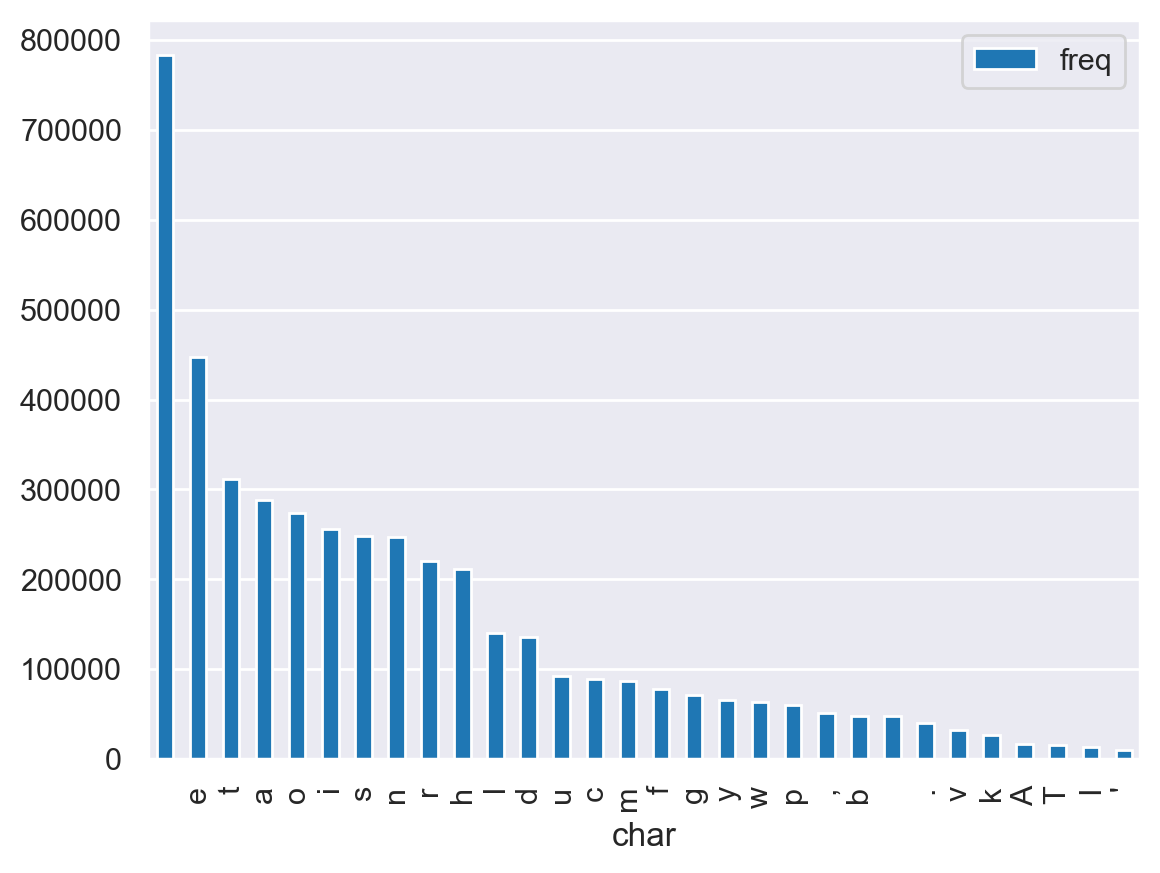

In [18]:
myth_char_freq_df.head(30).plot(kind="bar")
plt.grid(axis="x")
plt.show()

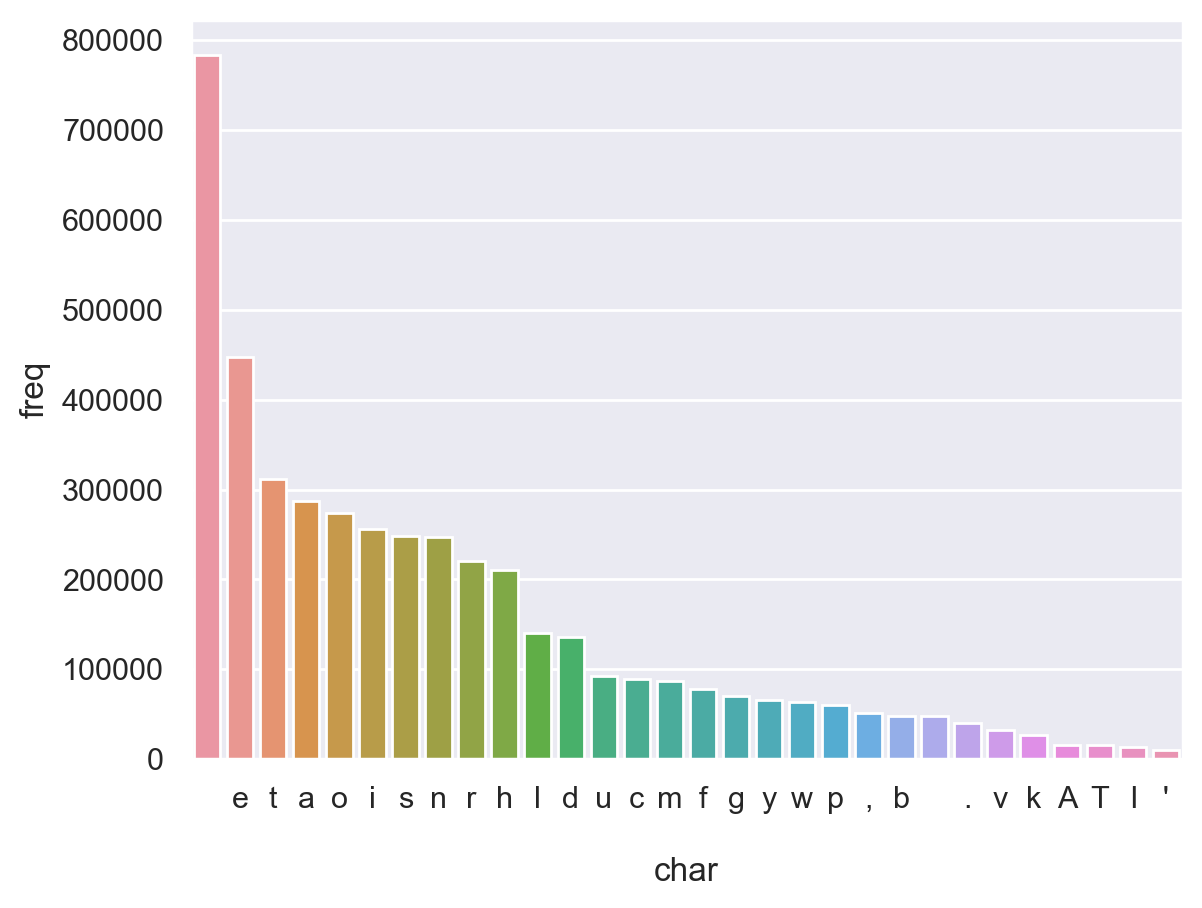

In [19]:
sns.barplot(
    x=myth_char_freq_df.head(30).index,
    y="freq",
    data=myth_char_freq_df.head(30),
)
plt.show()

/Users/benkabongo25/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


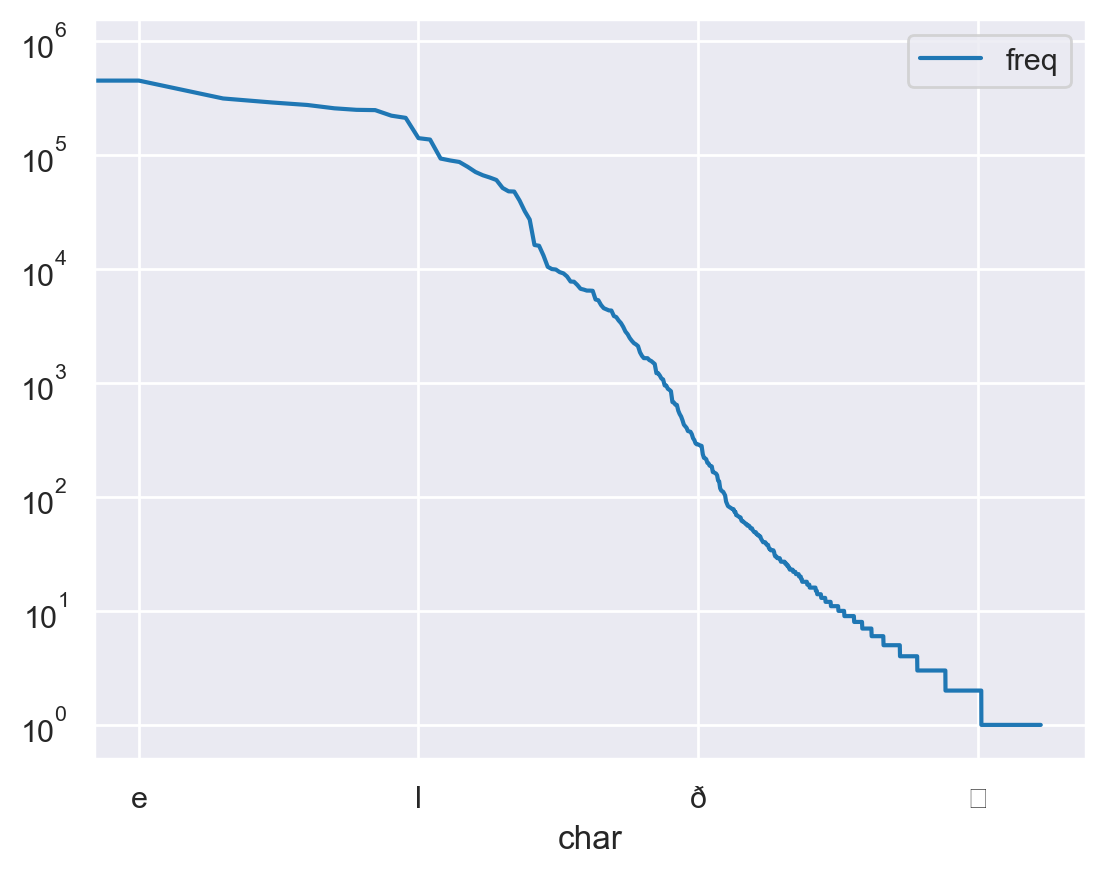

In [20]:
myth_char_freq_df.plot(loglog=True)
plt.show()

In [21]:
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


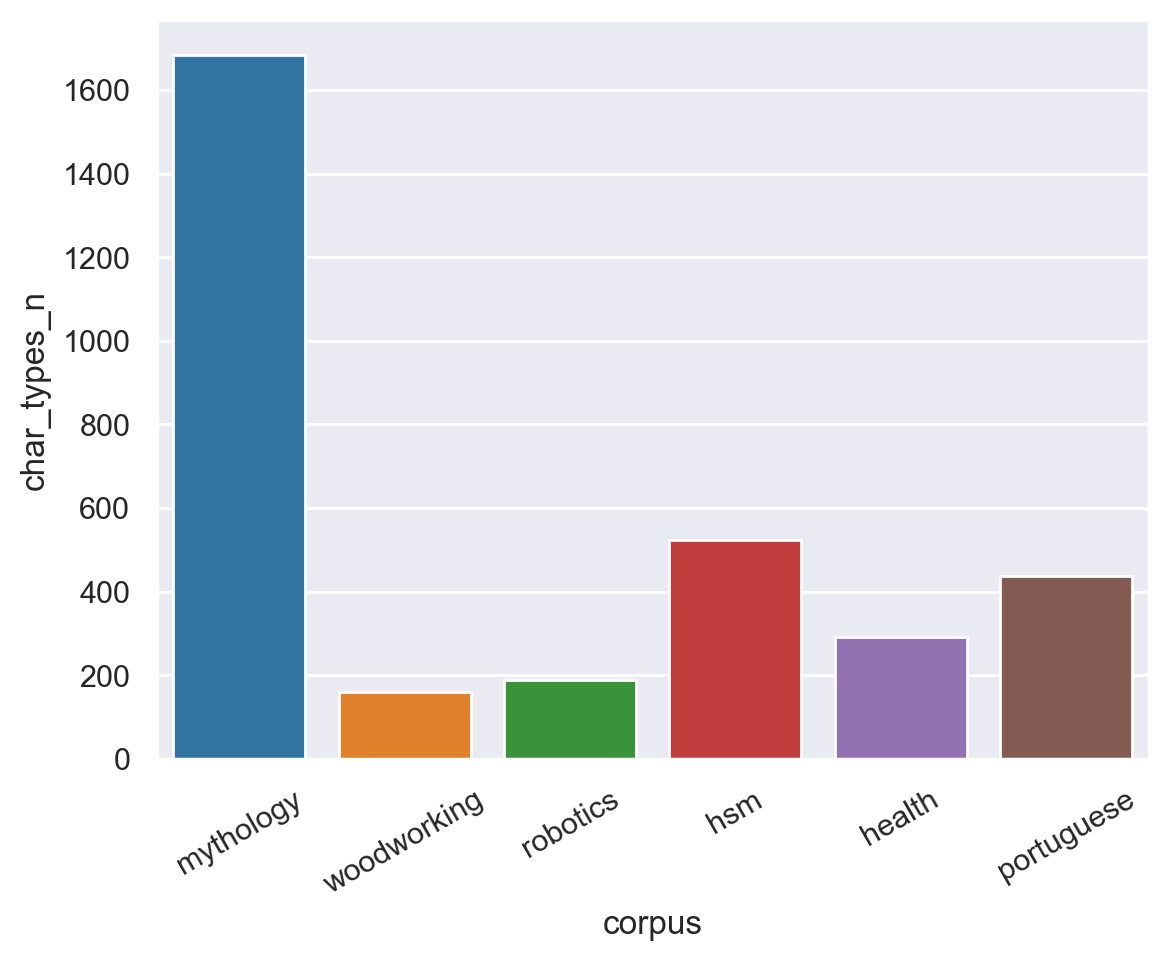

In [22]:
sns.barplot(x=df.index, y="char_types_n", data=df)
plt.xticks(rotation=30)
plt.show()

#### how to compute richness in characters?

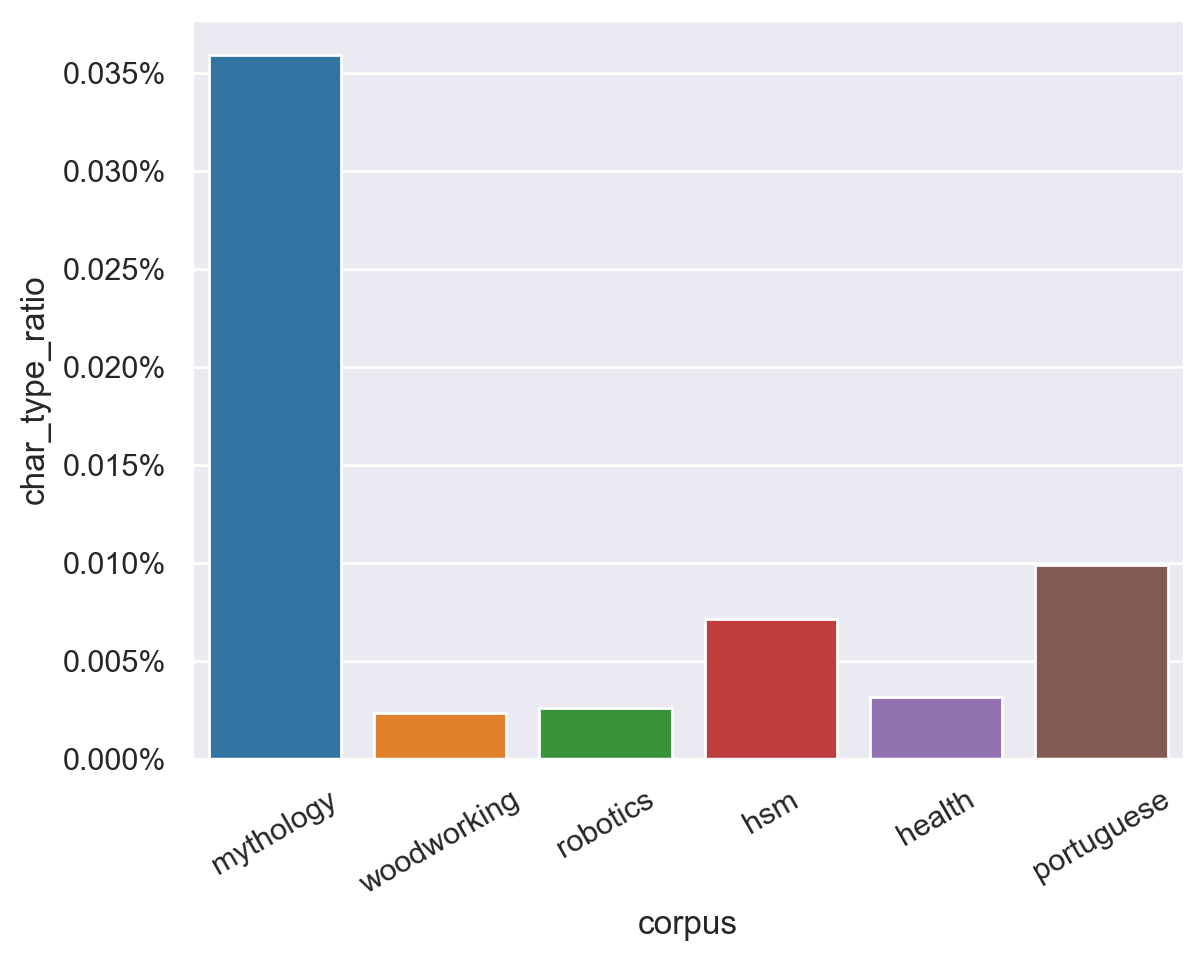

In [23]:
df["char_type_ratio"] = df.char_types_n / df.chars_n
ax = sns.barplot(x=df.index, y="char_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

In [24]:
char_counters = df.text.map(lambda x: Counter(x[:1000]))
print(char_counters.health)
df["type_chars_1000"] = char_counters.map(len)

Counter({' ': 151, 'e': 80, 'i': 67, 't': 66, 'o': 64, 'a': 57, 'n': 54, 's': 49, 'r': 48, 'l': 33, 'h': 29, 'c': 27, 'f': 23, '\n': 22, 'd': 22, 'g': 21, 'y': 18, 'u': 17, 'p': 13, 'm': 13, 'b': 10, '.': 9, 'w': 8, ':': 6, '9': 6, 'P': 5, 'S': 5, 'v': 5, ',': 5, '"': 4, '(': 4, ')': 4, 'T': 4, '0': 4, '1': 4, 'W': 3, 'L': 3, 'I': 3, 'A': 3, '-': 3, 'k': 3, '7': 3, 'Q': 2, 'H': 2, 'C': 2, '?': 2, "'": 2, 'R': 2, 'E': 2, 'O': 1, 'Y': 1, 'M': 1, '“': 1, '‘': 1, '’': 1, '”': 1, 'B': 1})


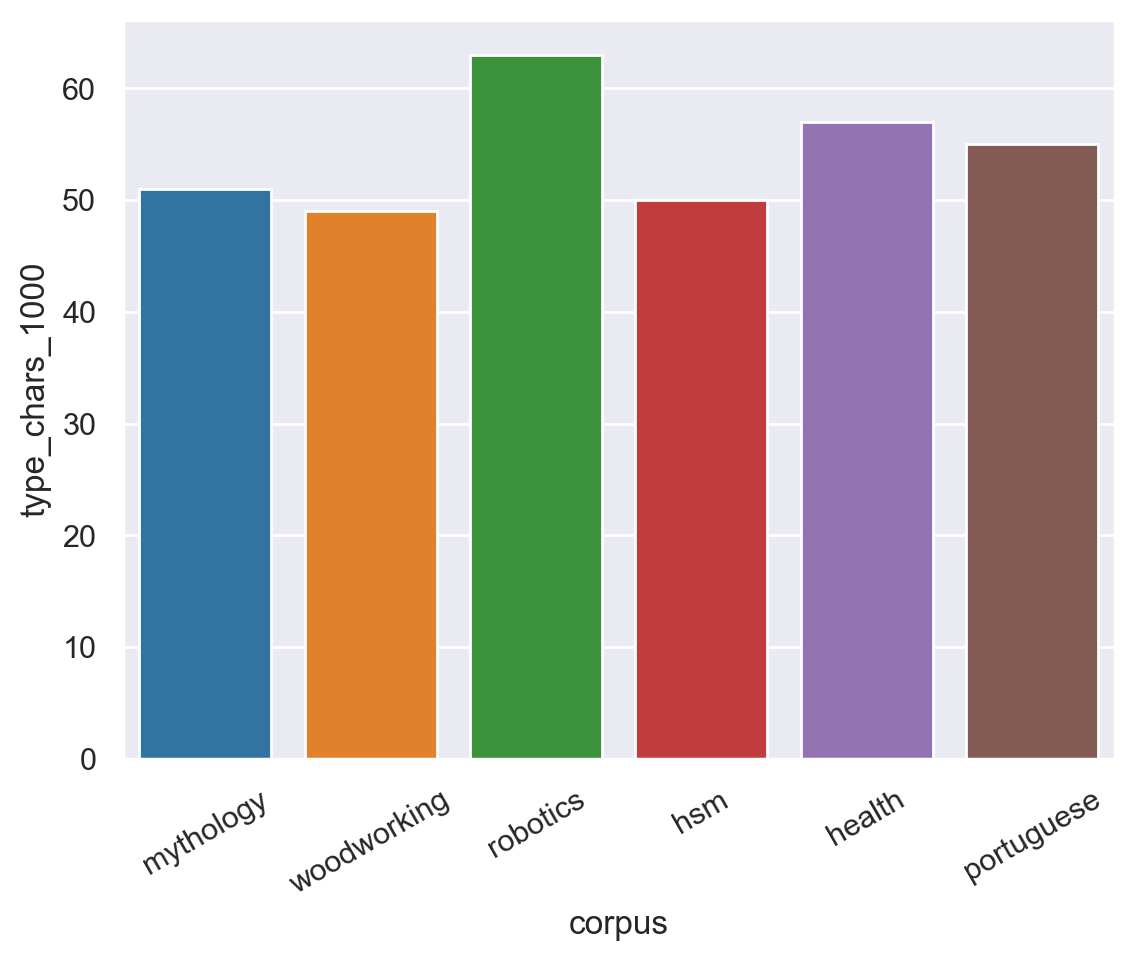

In [25]:
sns.barplot(x=df.index, y="type_chars_1000", data=df)
plt.xticks(rotation=30)
plt.show()

### What's going on here? Which text is the richest in characters?

In [26]:
HOP = 100_000

In [27]:
def batch_counts(text, max_len, hop):
    counters = [Counter()]
    for i in range(hop, max_len, hop):
        counters.append(counters[-1] + Counter(text[i - hop : i]))
    return [len(cntr) for cntr in counters]

In [28]:
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000
corpus,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55


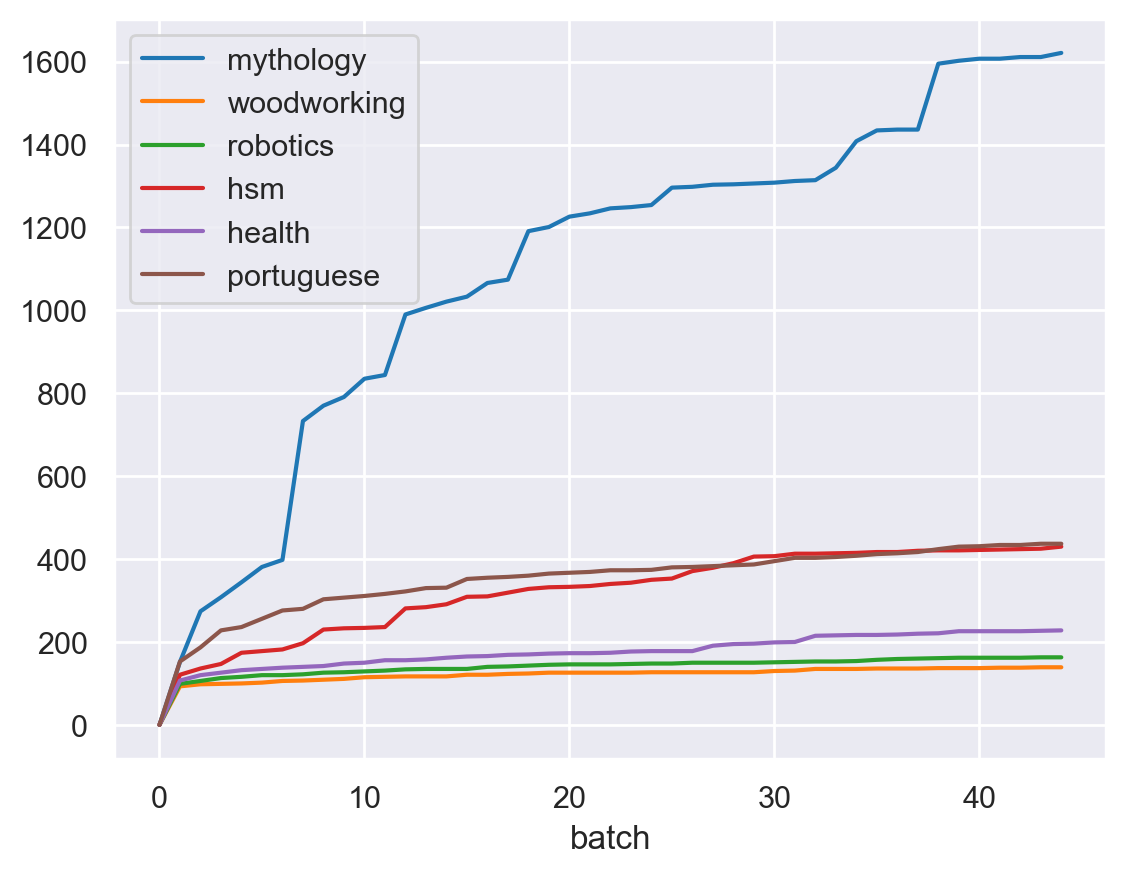

In [29]:
batch_counters = df.text.map(
    lambda x: batch_counts(x, max_len=df.chars_n.min(), hop=HOP)
)

batch_counters_df = pd.DataFrame(
    dict(zip(batch_counters.index, batch_counters.values))
)
batch_counters_df.index.name = "batch"

batch_counters_df.plot()
plt.show()

### What's happening here?
#### 🚧 TODO: Give some explanation

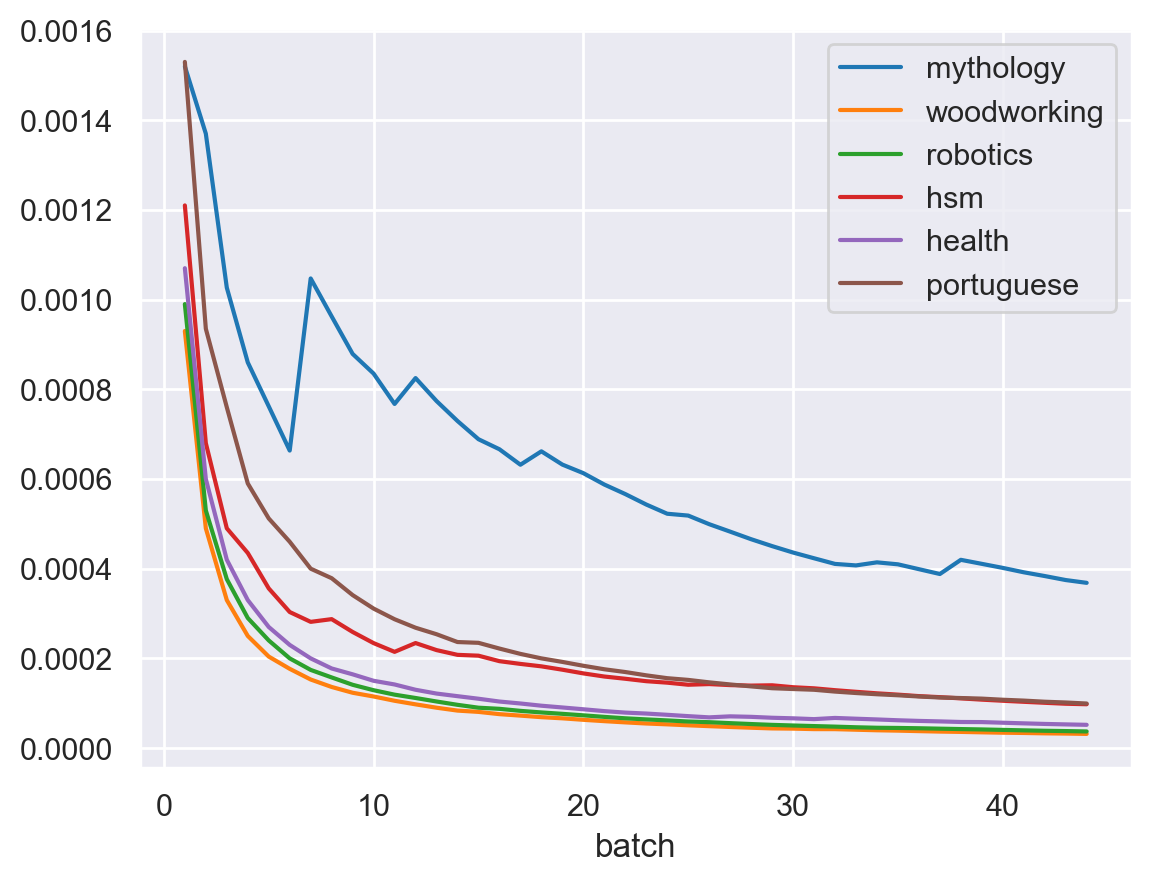

In [30]:
batches = np.arange(0, df.chars_n.min(), HOP)
batch_counters_freq_df = batch_counters_df.divide(batches, axis="index")
batch_counters_freq_df.plot()
plt.show()

# Tokens and words

### tokenizing

In [31]:
text = "Let's all together defeat last years' problem, SARS-CoV-2, in 2023!"
token_splits = text.split()

print("|".join(token_splits))
len(token_splits)

Let's|all|together|defeat|last|years'|problem,|SARS-CoV-2,|in|2023!


10

In [32]:
chars_re = re.compile(r"\W+")
token_splits = chars_re.split(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS|CoV|2|in|2023|


14

In [33]:
char_or_hyphen_re = re.compile(r"[\w-]+")
token_splits = char_or_hyphen_re.findall(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS-CoV-2|in|2023


11

Idiosyncratic rules for English!

- Think of *viens-tu*, *où va-text-il*, *Kaffeetasse*, *cantolo*, *我爱你*, ...

- Can you think of other cases in your language where the tokenizer does not work? What does the tokenizer do?

### Using a specialized class: `nltk`

In [34]:
nltk_tokens = word_tokenize(text)

print("|".join(nltk_tokens))
len(nltk_tokens)

Let|'s|all|together|defeat|last|years|'|problem|,|SARS-CoV-2|,|in|2023|!


15

### Not bad. Does it work for Portuguese?

In [35]:
pt_tokens = word_tokenize(corpora["portuguese"][:333])

print("|".join(pt_tokens))
len(pt_tokens)

Q|:|Qual|a|origem|da|expressão|``|o|fim|da|picada|''|?|Se|,|em|geral|,|``|picada|''|é|uma|coisa|negativa|,|pois|remete|a|dor|e|coceira|,|como|pode|ser|que|``|o|fim|da|picada|''|seja|uma|expressão|também|negativa|?|A|:|Picada|(|Aulete|,|3|)|é|também|“|caminho|aberto|em|mata|fechada|a|golpes|de|facão|ou|foice|”|.|E|a|minha|interpretação|foi|sempre|que|o|f


83

In [36]:
print(corpora["portuguese"][:333])

Q:

Qual a origem da expressão "o fim da picada"?

Se, em geral, "picada" é uma coisa negativa, pois remete a dor e coceira, como pode ser que "o fim da picada" seja uma expressão também negativa?

A:

Picada (Aulete, 3) é também “caminho aberto em mata fechada a golpes de facão ou foice”. E a minha interpretação foi sempre que o f


`Yes, it's work `

Watch out: do = de + o

**And it's slow!**

In [37]:
toks = [
    word_tokenize(text[:1_000_000]) for corpus, text in tqdm(corpora.items())
]

  0%|          | 0/6 [00:00<?, ?it/s]

So be patient for this line:

In [38]:
tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

In [39]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["nr_types"] = df.tokens.map(set).map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,nr_types
corpus,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942599,51253
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390532,32318
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63,"[Q, :, How, is, this, torque, value, arrived, ...",1526904,53833
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50,"[Q, :, When, and, why, did, people, stopped, u...",1445136,62464
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714931,66006
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55,"[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907242,60282


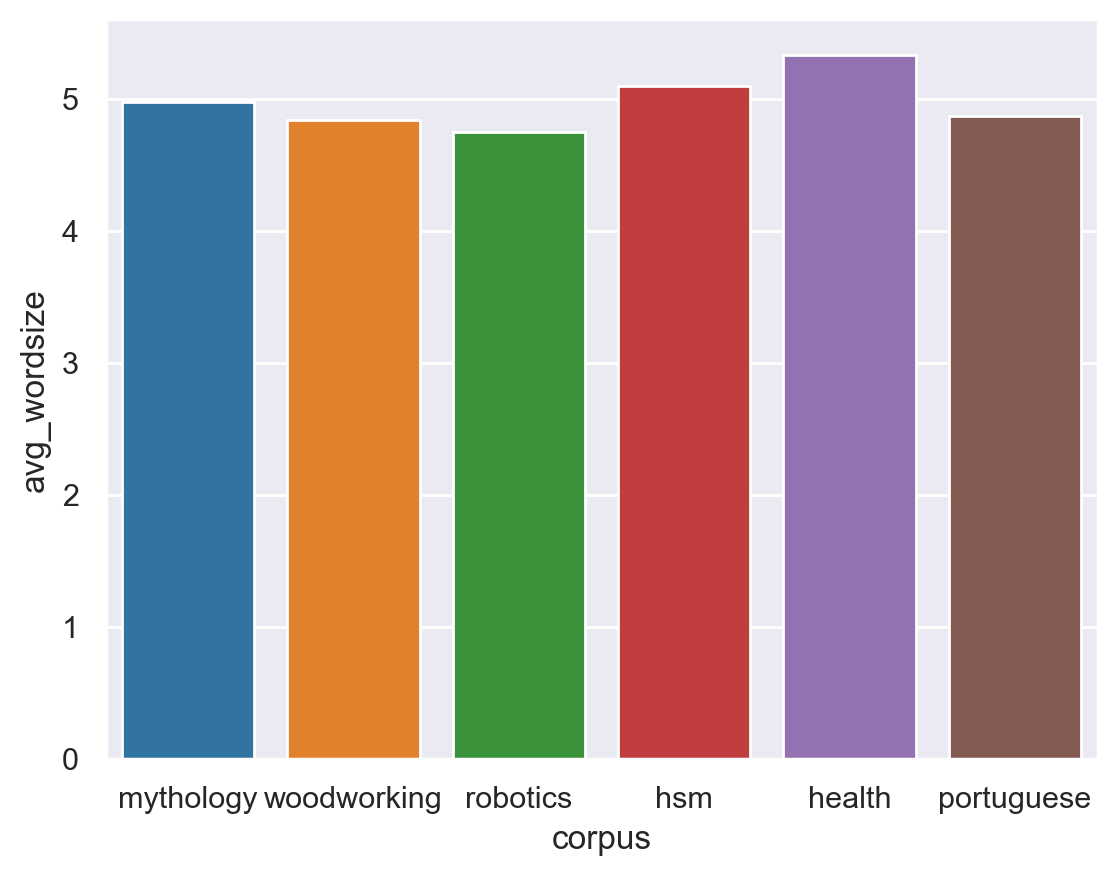

In [40]:
df["avg_wordsize"] = df.chars_n / df.tokens_n
sns.barplot(x=df.index, y="avg_wordsize", data=df)
plt.show()

In [41]:
word_ctr = Counter(df.tokens.mythology)
mytho_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
mytho_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
mytho_tok_freq_df.index.name = "token"
mytho_tok_freq_df.head()

,freq
token,
the,51133
",",51118
.,33172
of,29559
and,21018


In [42]:
word_ctr = Counter(df.tokens.woodworking)
wood_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
wood_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
wood_tok_freq_df.index.name = "token"
wood_tok_freq_df.head()

,freq
token,
the,65222
.,52197
",",41321
to,38592
a,37003


### Frequency of word length

#### 🚧 TODO

- Give the average length of tokens per corpus - clearly define what average you measure!

- Give the longest word per corpus and give their length

In [43]:
def avg_len_tokens(tokens):
    return sum(len(token) for token in tokens) / len(tokens)

def max_len_tokens(tokens):
    return max(len(token) for token in tokens)

def longest_words(tokens):
    max_len = max_len_tokens(tokens)
    return [token for token in tokens if len(token) == max_len]

In [44]:
print("\n*** average length in the dictionary (on types) ***")
display(tokens.map(avg_len_tokens))


*** average length in the dictionary (on types) ***


corpus
mythology      4.10
woodworking    3.94
robotics       3.89
hsm            4.26
health         4.45
portuguese     4.04
Name: text, dtype: float64

In [45]:
print("\n*** the longest words' length ***")
display(tokens.map(max_len_tokens))

print("\n*** the longest words ***")
display(tokens.map(longest_words))


*** the longest words' length ***


corpus
mythology      305
woodworking    137
robotics       199
hsm            178
health         265
portuguese     125
Name: text, dtype: int64


*** the longest words ***


corpus
mythology      [亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問...
woodworking    [//www.hafele.com/us/en/products/furniture-kit...
robotics       [//helgewurdemann.files.wordpress.com/2014/10/...
hsm            [//www.quora.com/What-are-the-ways-to-understa...
health         [//www.researchgate.net/profile/Secil_Vural/pu...
portuguese     [//educacao.uol.com.br/disciplinas/cultura-bra...
Name: text, dtype: object

#### We can try to remove all non-ascii characters to get to actual long words

In [46]:
wood_tok_freq_df["len"] = wood_tok_freq_df.index.str.len()
wood_tok_filtered_df = wood_tok_freq_df[
    ~wood_tok_freq_df.index.str.contains(r"[0-9/=+\._-]")
]
wood_tok_filtered_df.sort_values(by="len", ascending=False).head(10)

,freq,len
token,,
halfdovetaillapjoints,1,21
GraphussupportsMonica,1,21
AloysiusDefenestrate,1,20
CrazyRussianWoodShop,1,20
curiouslysatisfying,1,19
CanadianWoodworking,1,19
oversimplification,3,18
GreatPlanesTrading,1,18
characteristically,1,18


- Yay! we found "disproportionately"!

#### 🚧 TODO: Let's process all corpora to get their word length distribution

In [47]:
def len_freq_counter(tokens):
    return Counter(len(token) for token in tokens)

len_freq_df = df.tokens.map(len_freq_counter)
len_freq_df

corpus
mythology      {1: 153309, 3: 166898, 6: 67226, 8: 40900, 4: ...
woodworking    {1: 212944, 7: 78884, 3: 256457, 11: 11000, 10...
robotics       {1: 392526, 3: 235938, 2: 218484, 4: 189724, 6...
hsm            {1: 272686, 4: 173547, 3: 219498, 6: 92866, 7:...
health         {1: 288045, 4: 236943, 7: 116943, 2: 268598, 8...
portuguese     {1: 232324, 4: 81767, 6: 67959, 2: 146411, 9: ...
Name: tokens, dtype: object

#### 🚧 TODO: Let's plot the mythology word length distribution

In [48]:
sorted_c = len_freq_df.mythology.most_common()
myth_len_freq_df = pd.DataFrame(sorted_c, columns=['Len', 'Count'])
myth_len_freq_df = myth_len_freq_df.set_index('Len').sort_values(by=['Count'], ascending=False)
myth_len_freq_df.head()

,Count
Len,
3,166898
2,153910
1,153309
4,134176
5,94334


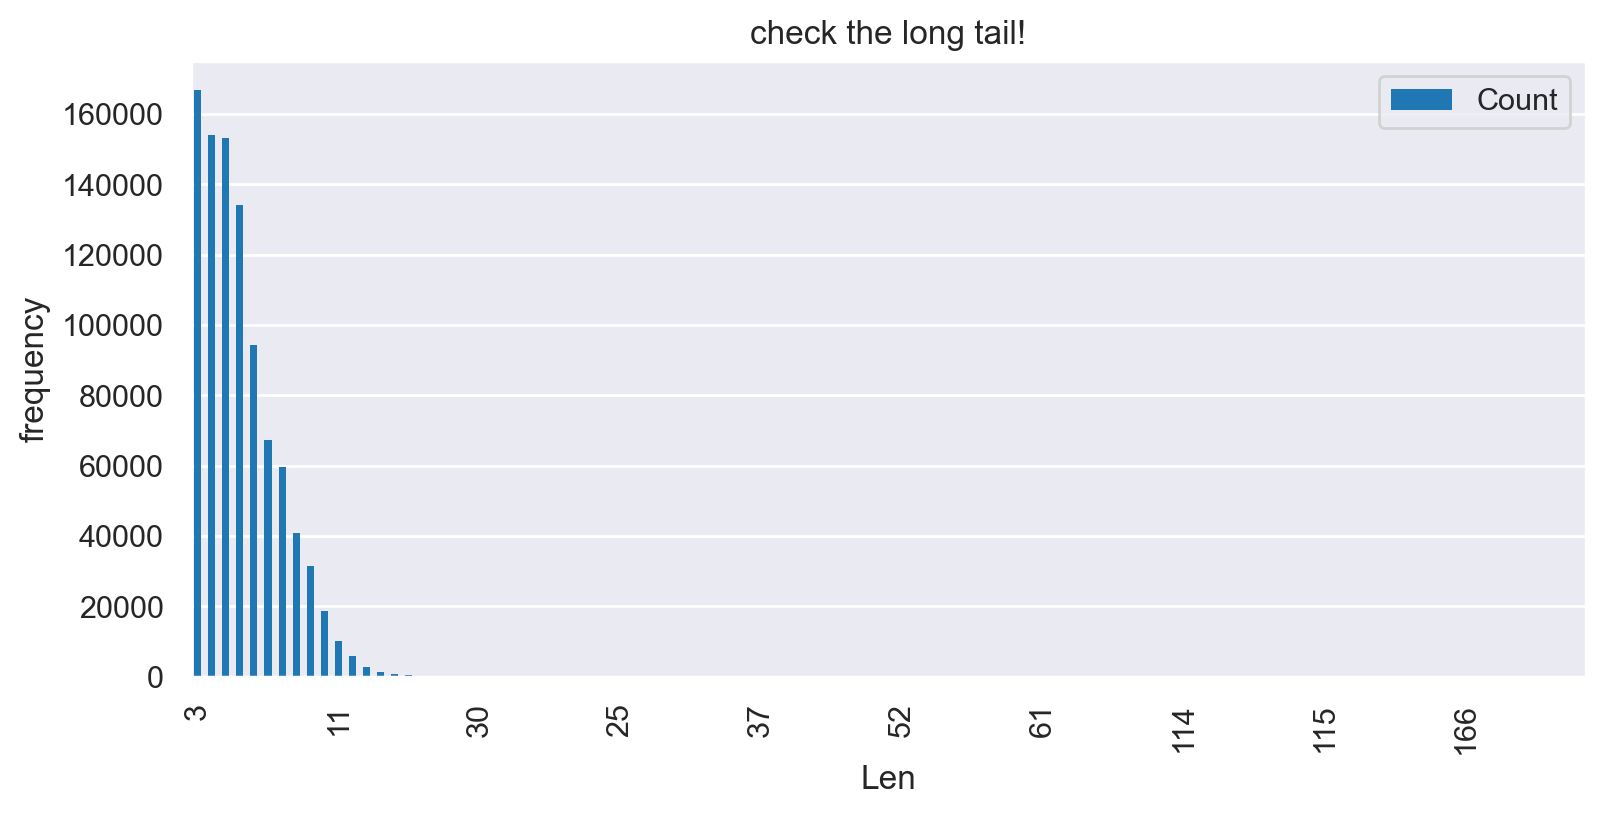

In [49]:
# with plt.style.context("default"):
ax = myth_len_freq_df.plot.bar(
    figsize=(9, 4), title="check the long tail!", linewidth=0,
)
# Print only 1 x-tick-label out of 10
for i, label in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        label.set_visible(False)
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# do not order!

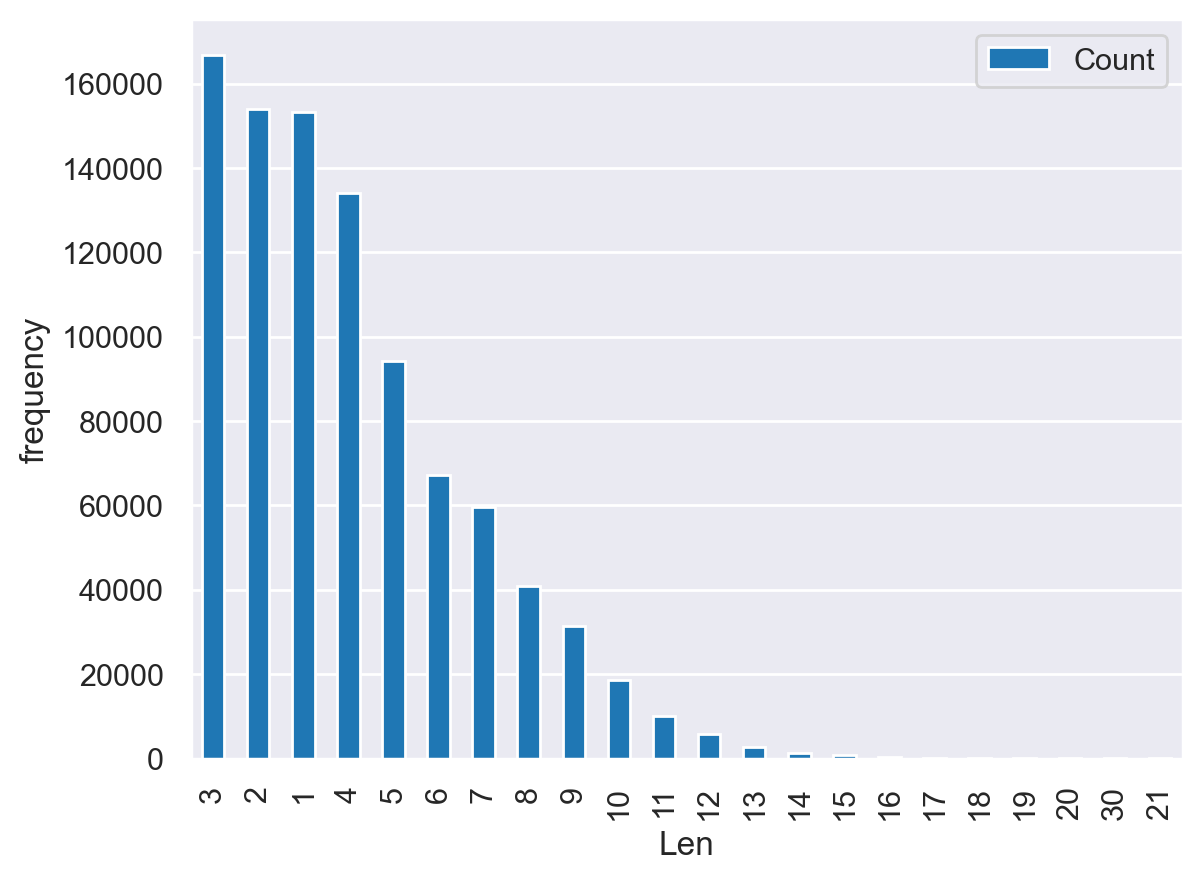

,Count
Len,
3,166898
2,153910
1,153309
4,134176
5,94334


In [50]:
myth_len_freq_df.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

myth_len_freq_df.head(5)

- If you order by token length you get a nice curve, something close to the hypergeometric distribution:

In [51]:
#len_freq_df.mythology.head(22).plot.bar()
#plt.ylabel("frequency")
#plt.grid(axis="x")
#plt.show()

# 💥 Let's Zipf token frequencies!

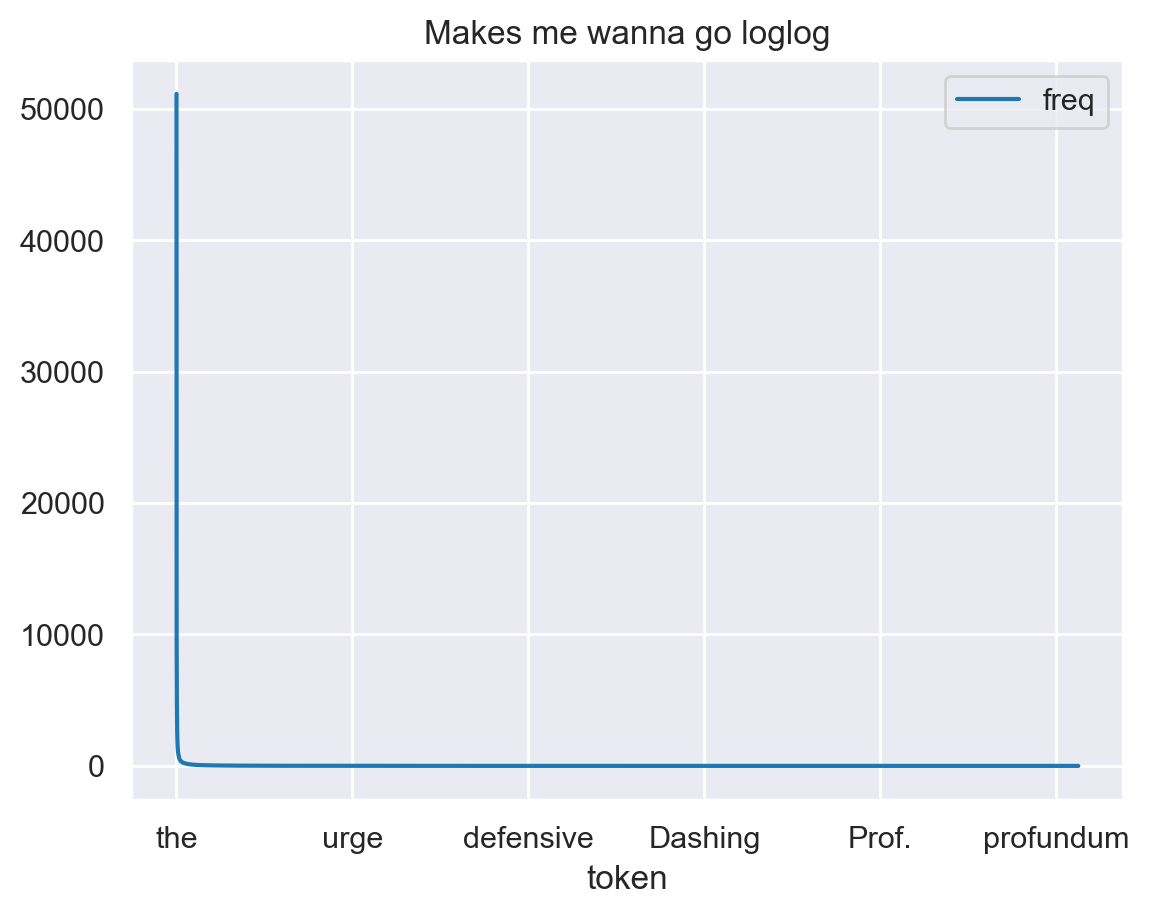

In [52]:
mytho_tok_freq_df.plot(title="Makes me wanna go loglog")
plt.show()

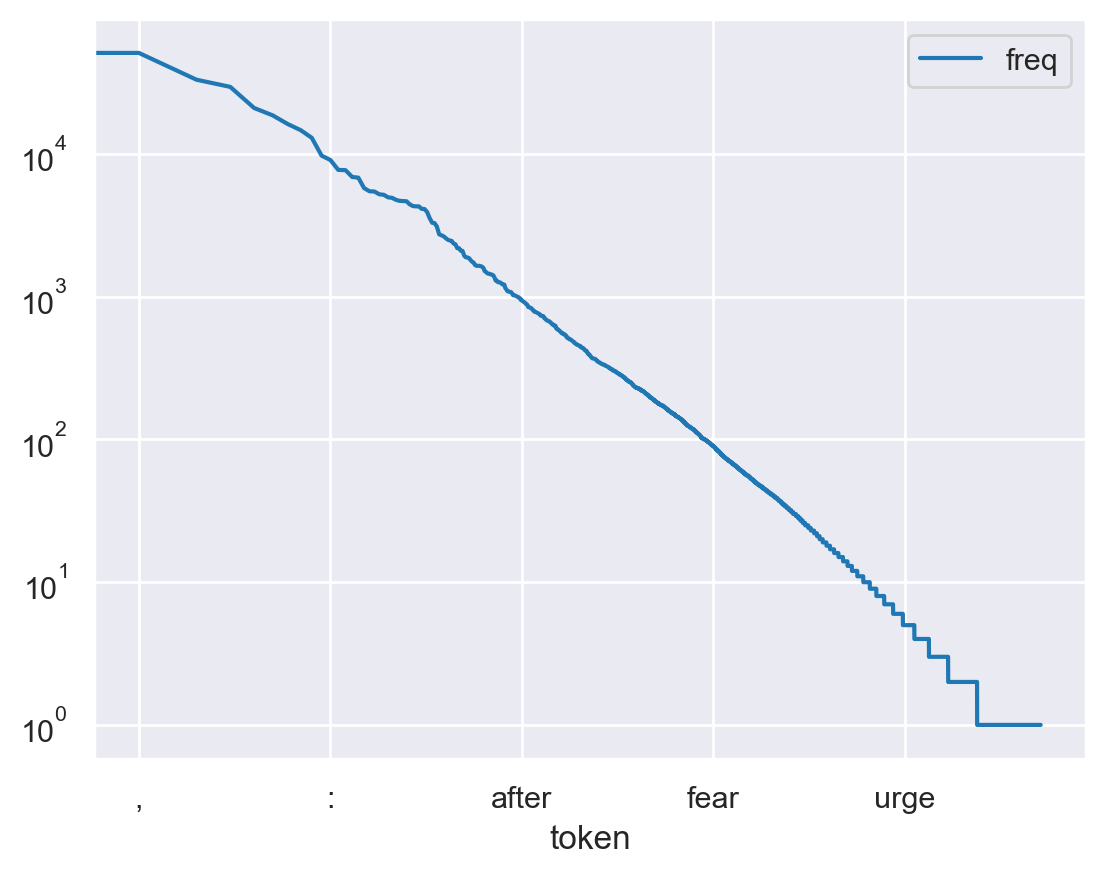

In [53]:
mytho_tok_freq_df.plot(loglog=True)
plt.show()

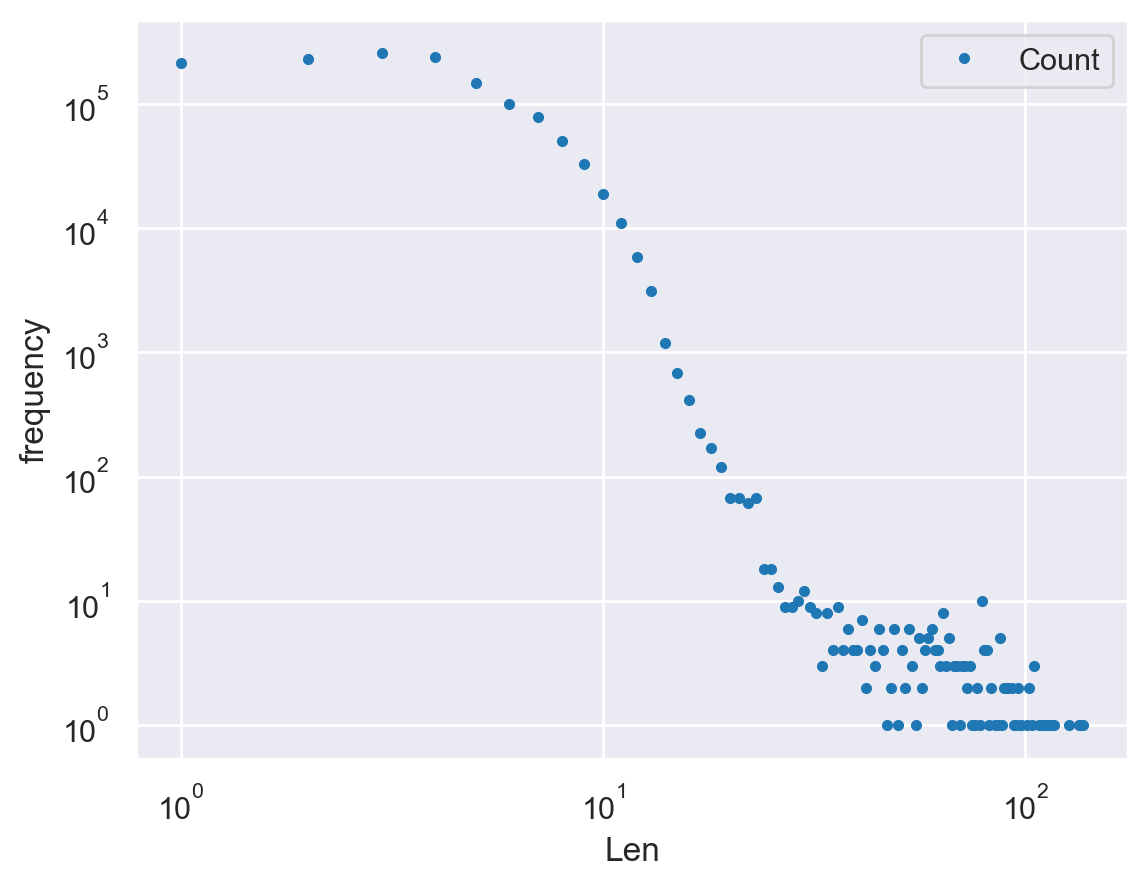

In [54]:
sorted_c = len_freq_df.woodworking.most_common()
wood_len_freq_df = pd.DataFrame(sorted_c, columns=['Len', 'Count'])
wood_len_freq_df = wood_len_freq_df.set_index('Len').sort_values(by=['Count'], ascending=False)
wood_len_freq_df.plot(loglog=True, style=".")
plt.ylabel("frequency")
plt.show()

### Wow! How straight is that!

- Explain why there are: `,: after fear Z?`

#### 🚧 TODO: Now let's process the length distribution for every corpus

Tokens Len Freq Log Plot


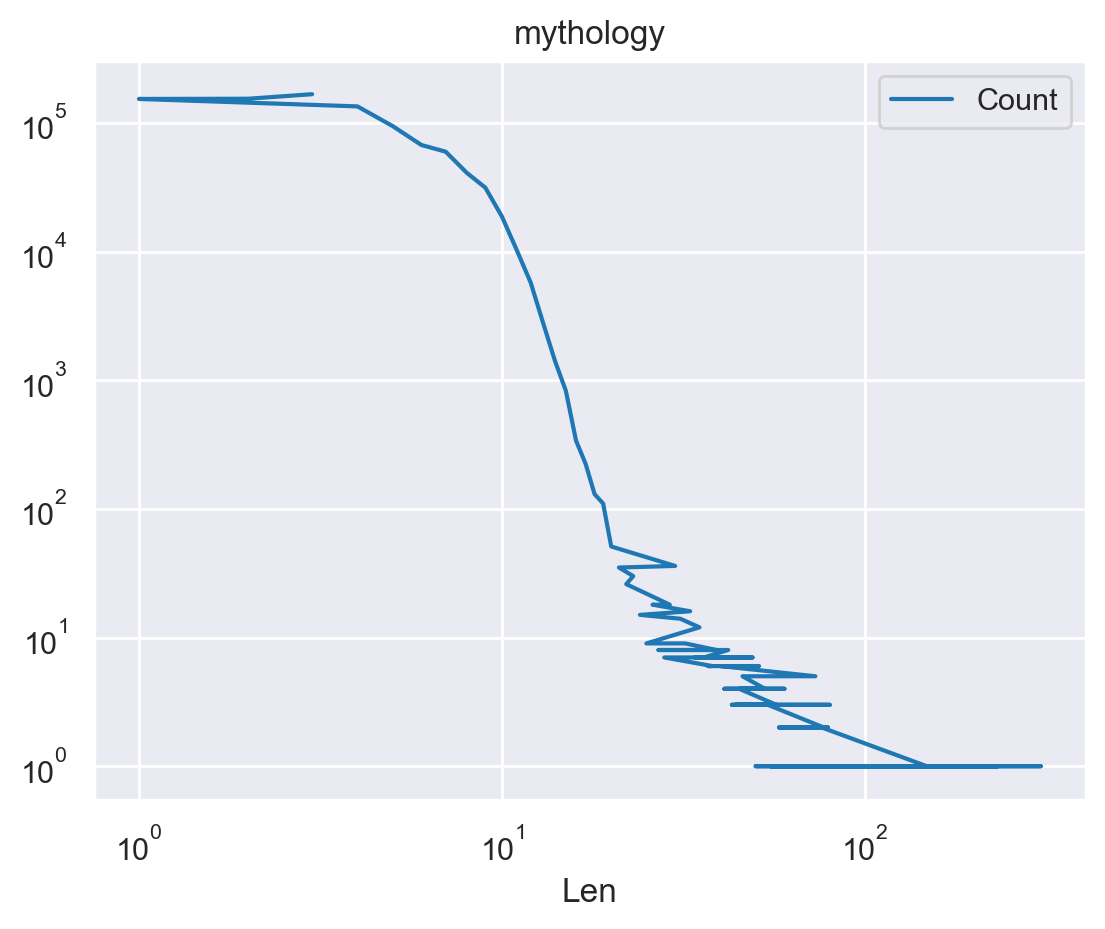

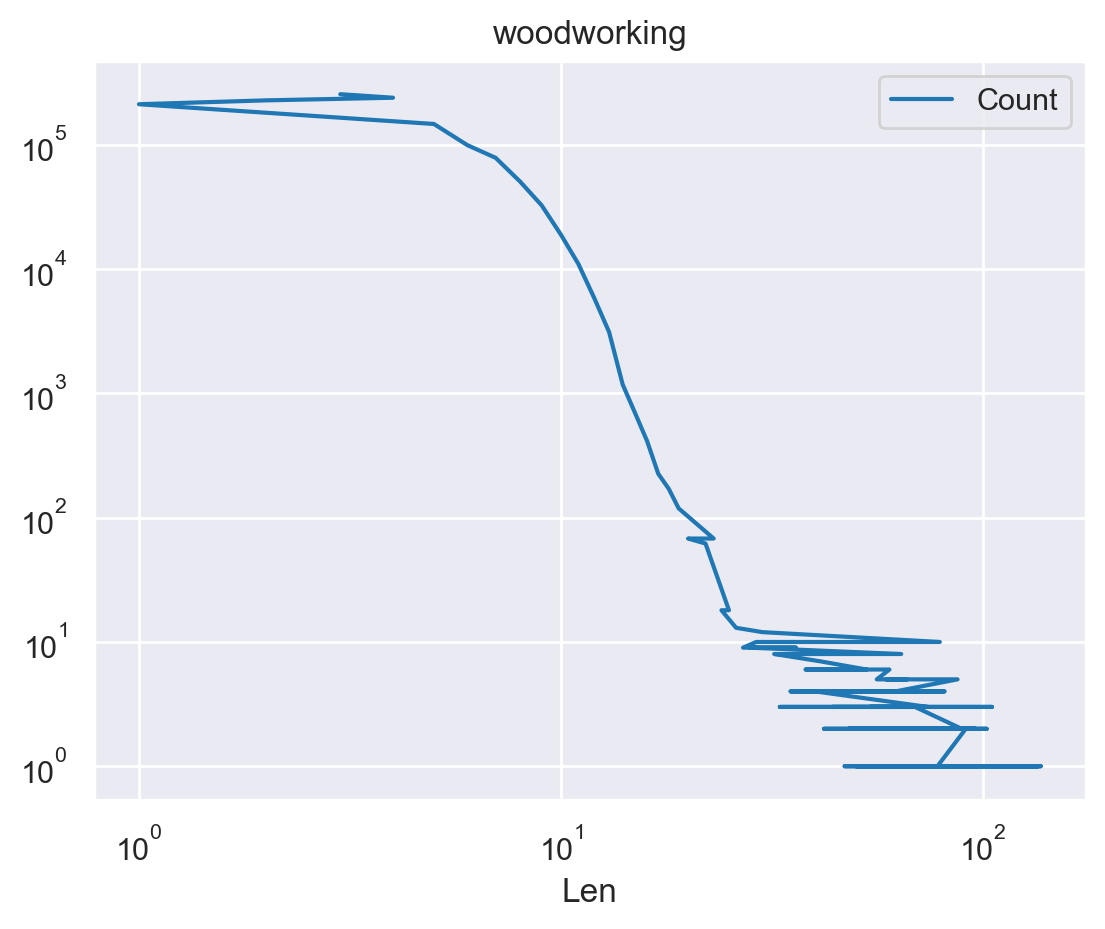

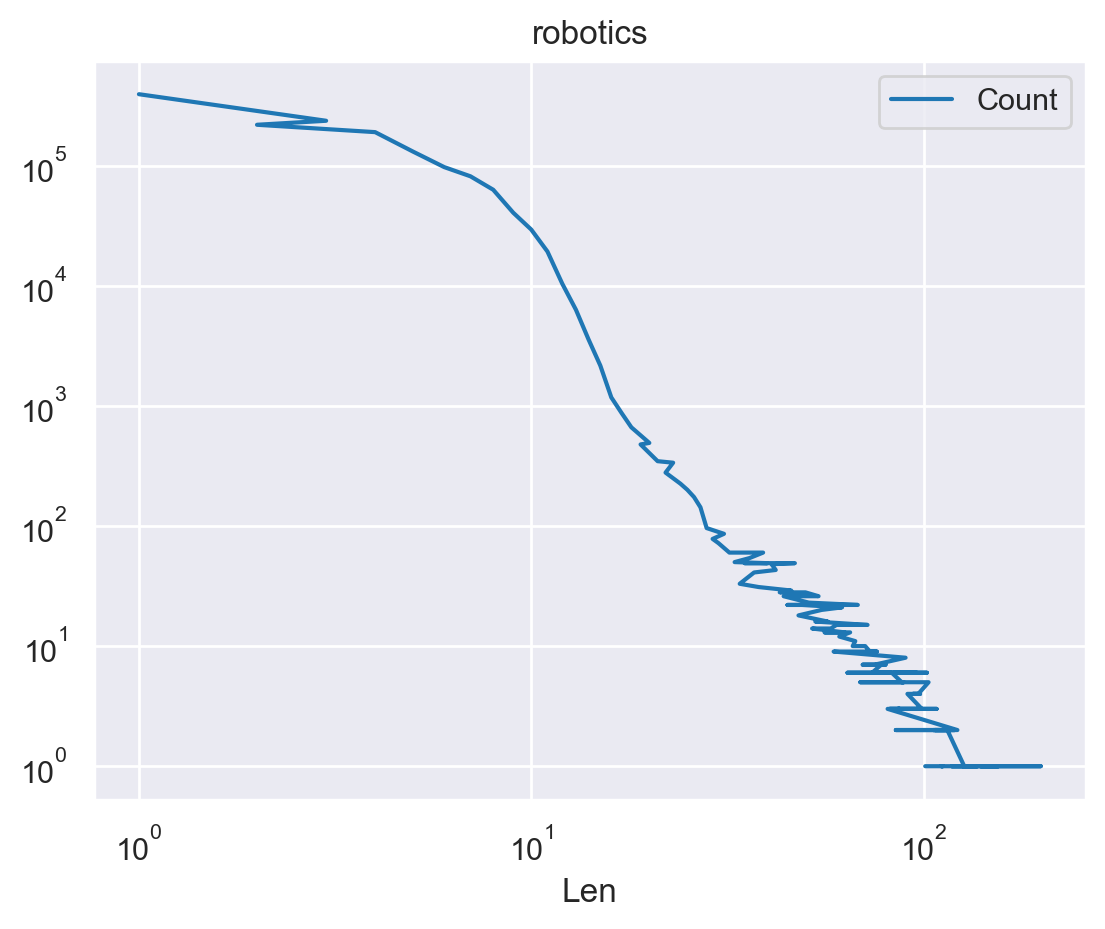

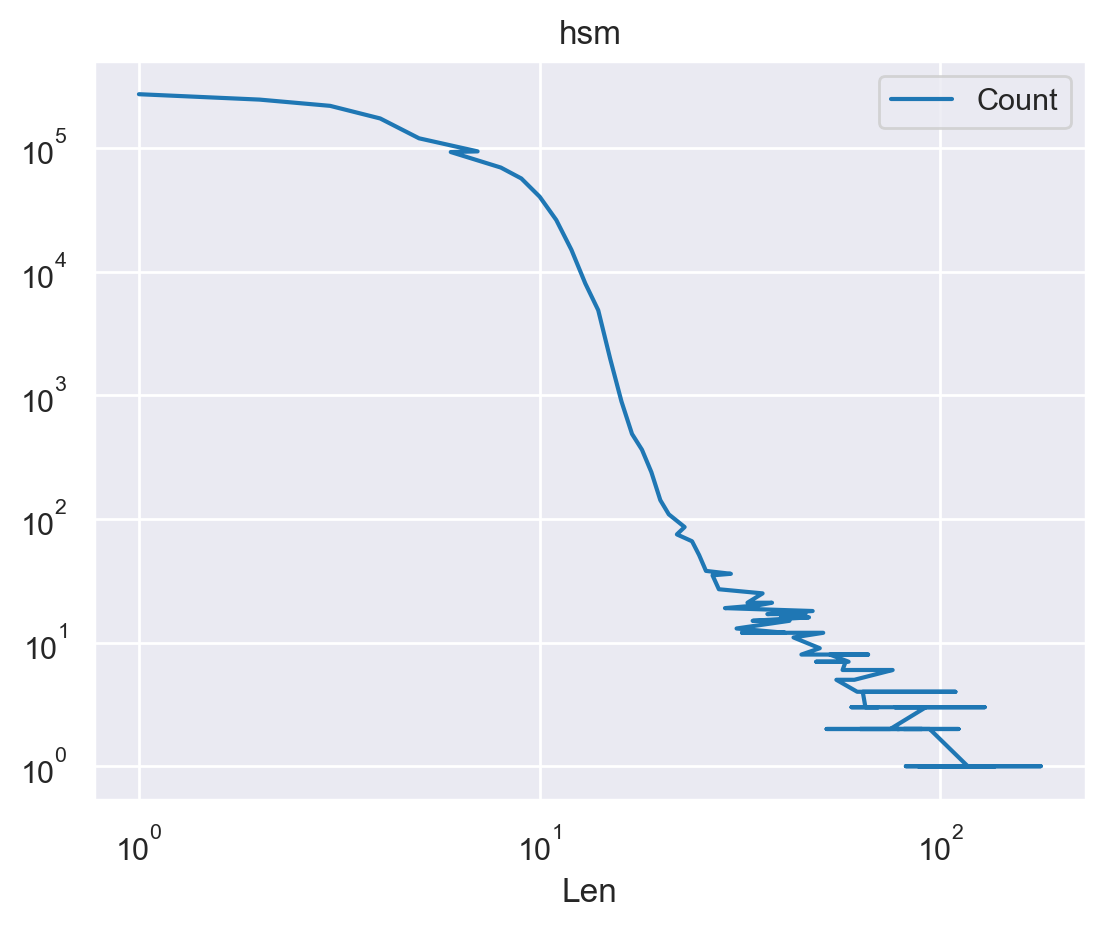

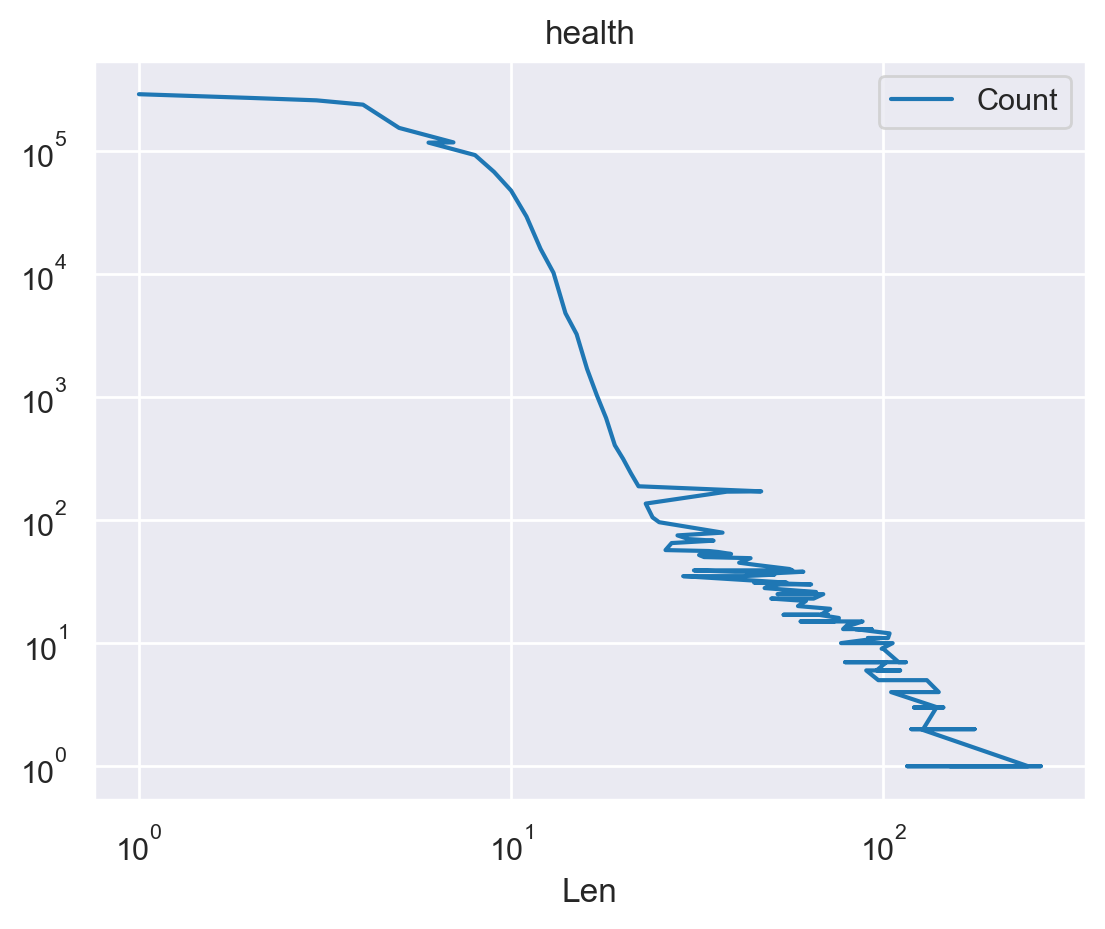

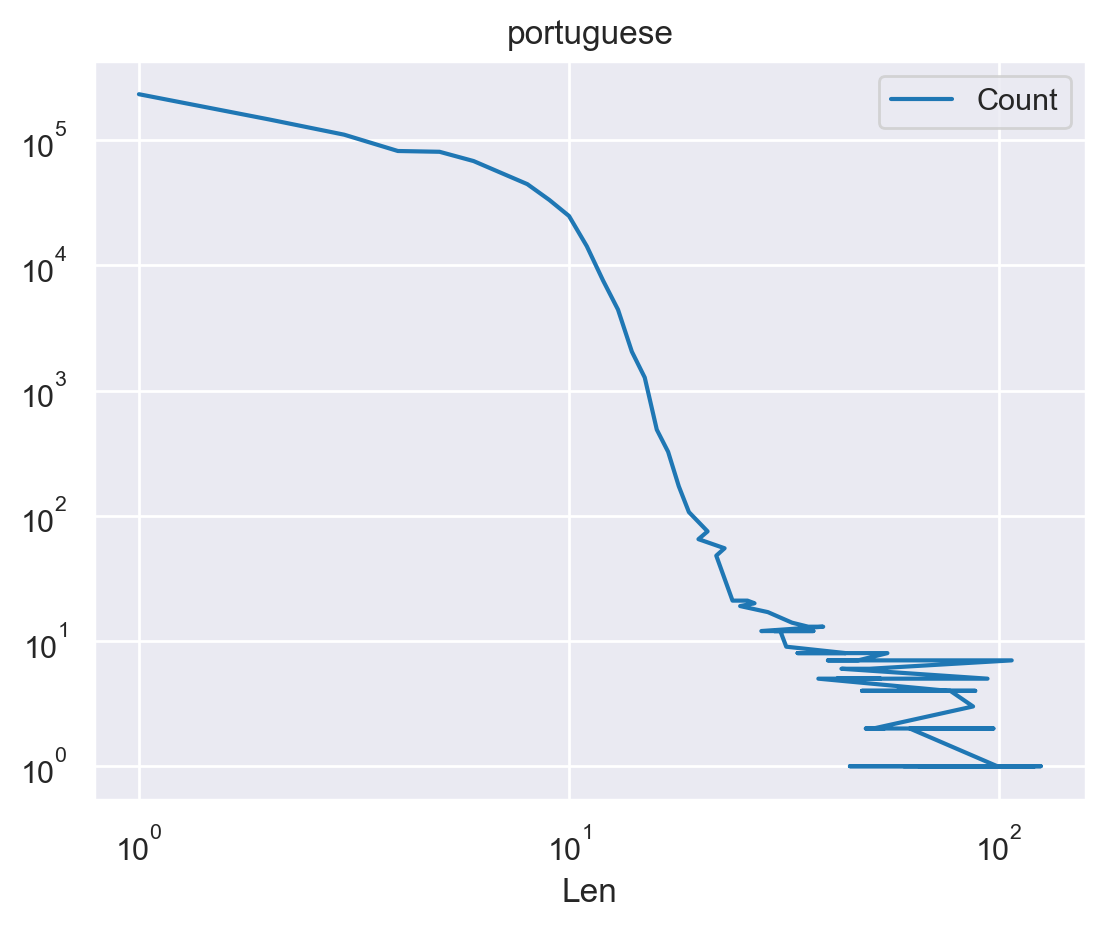

In [55]:
print('Tokens Len Freq Log Plot')
for c, v in len_freq_df.items():
    c_df = (pd.DataFrame(v.most_common(), columns=['Len', 'Count']).
                set_index('Len').
                sort_values(by=['Count'], ascending=False))
    c_df.plot(loglog=True)
    plt.title(c)
    plt.show()

Tokens freq Log Plot


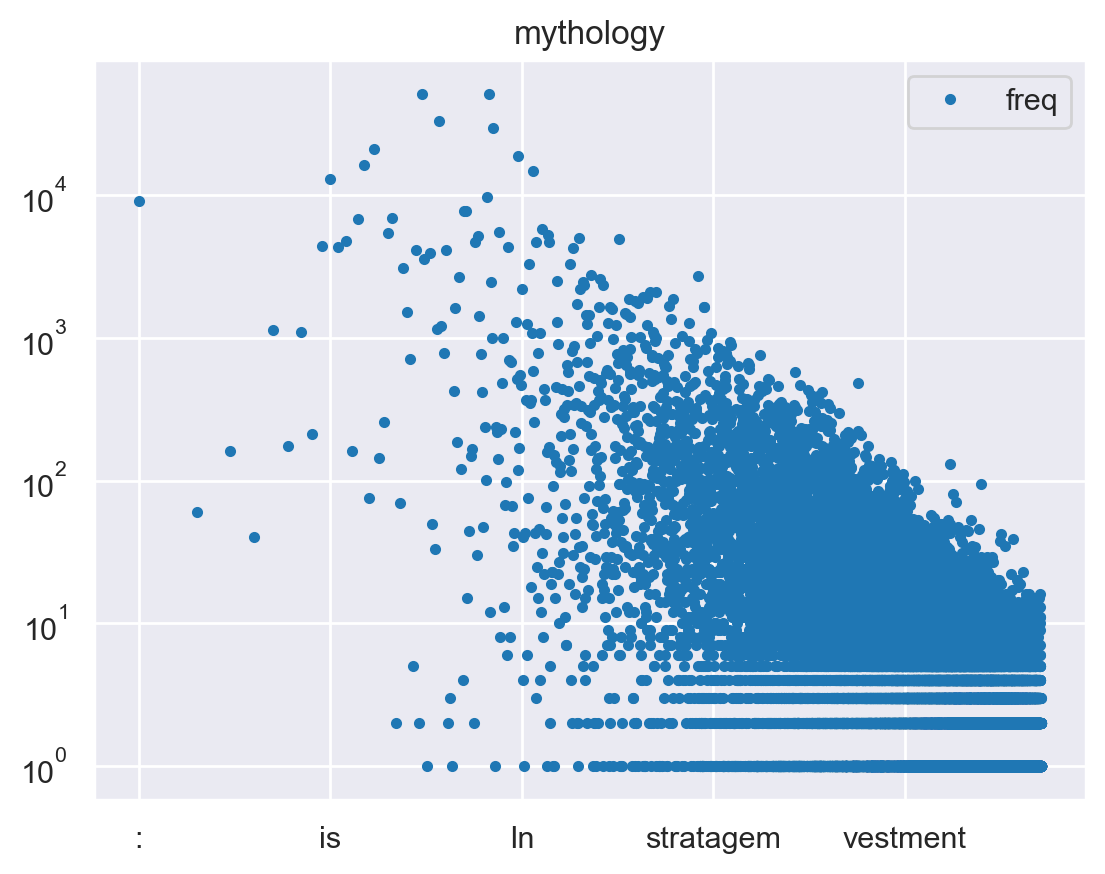

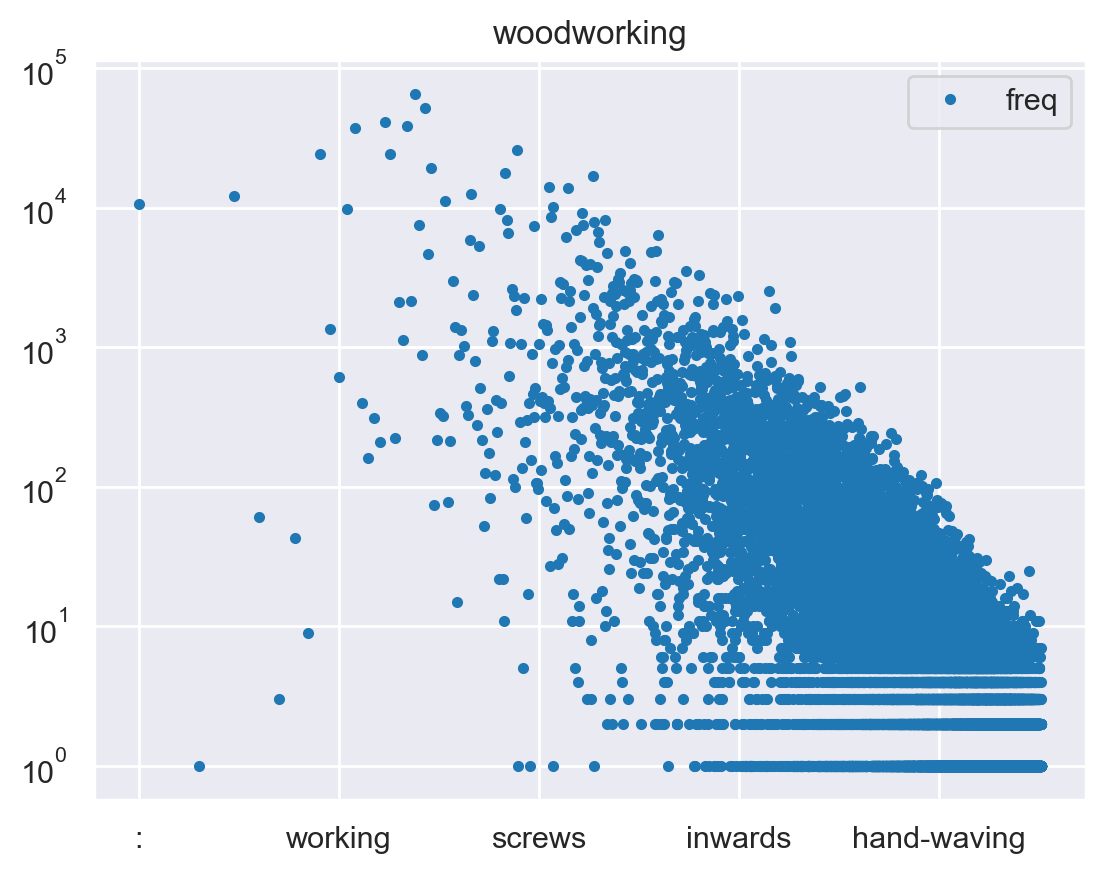

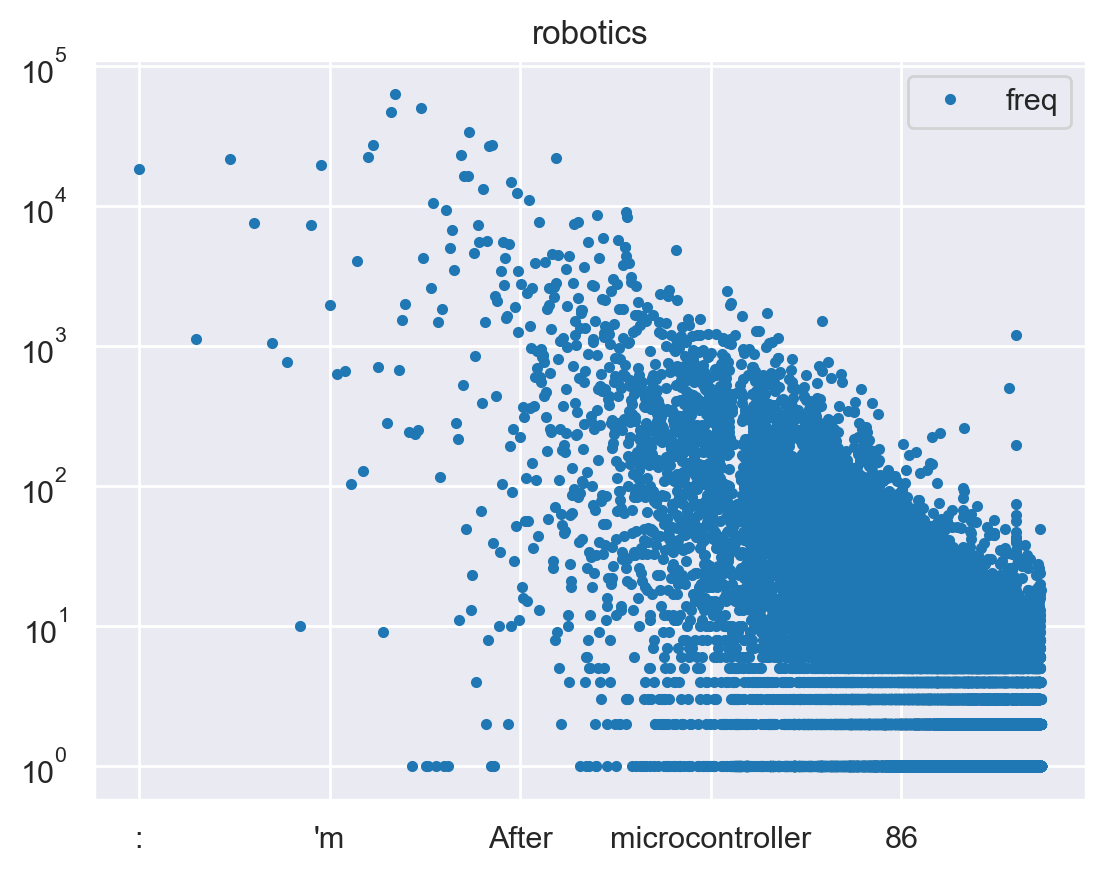

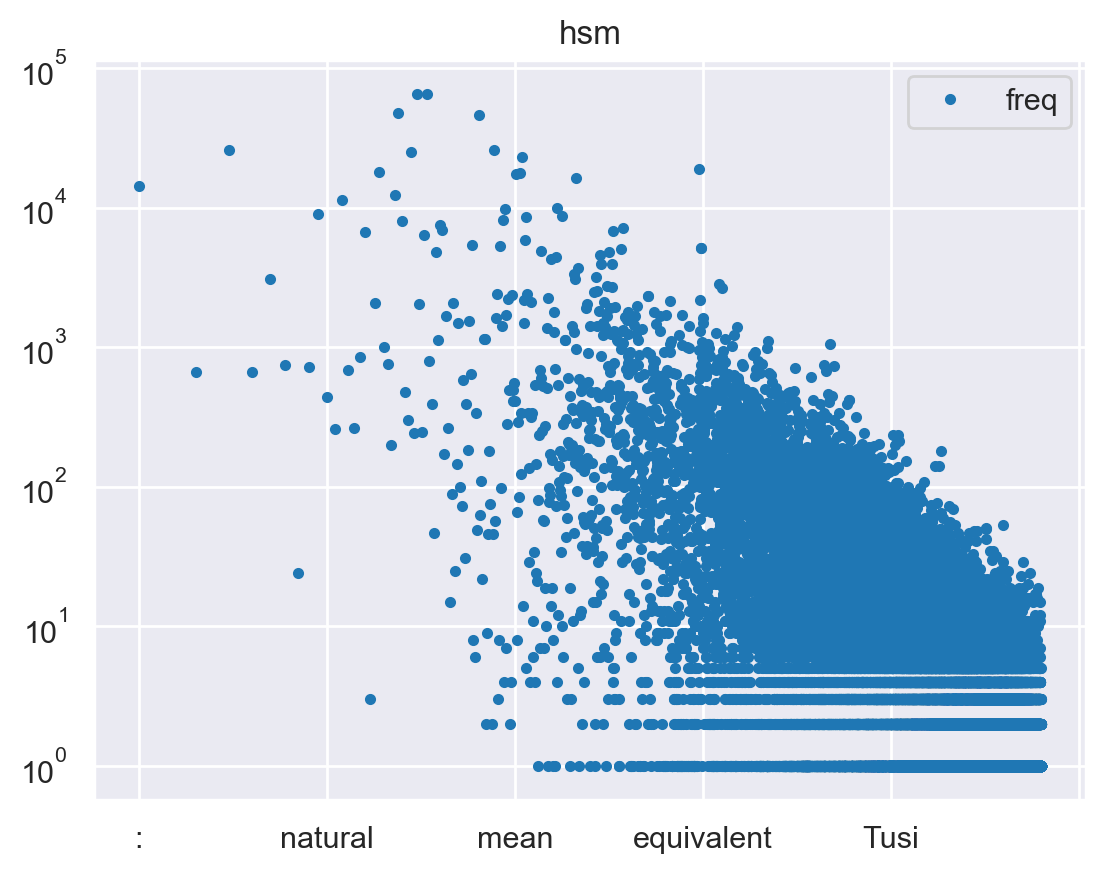

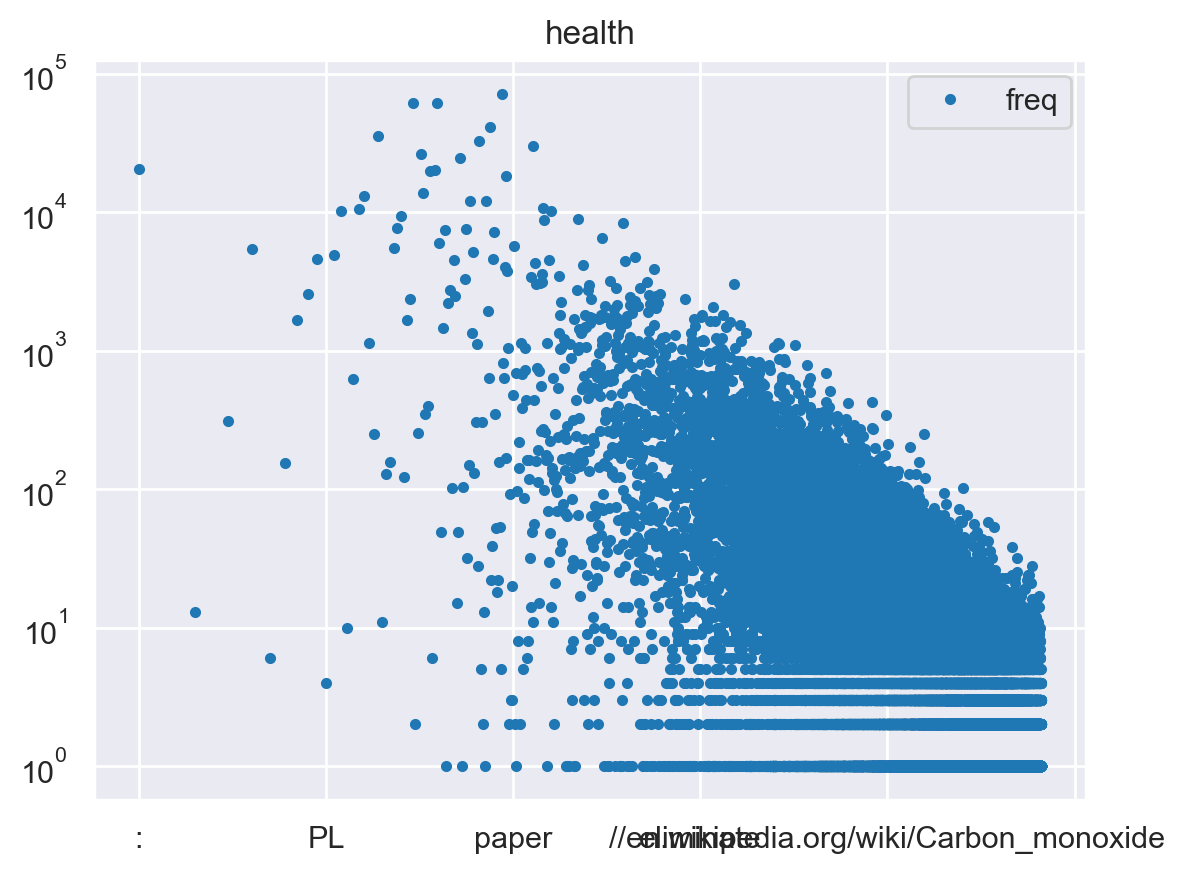

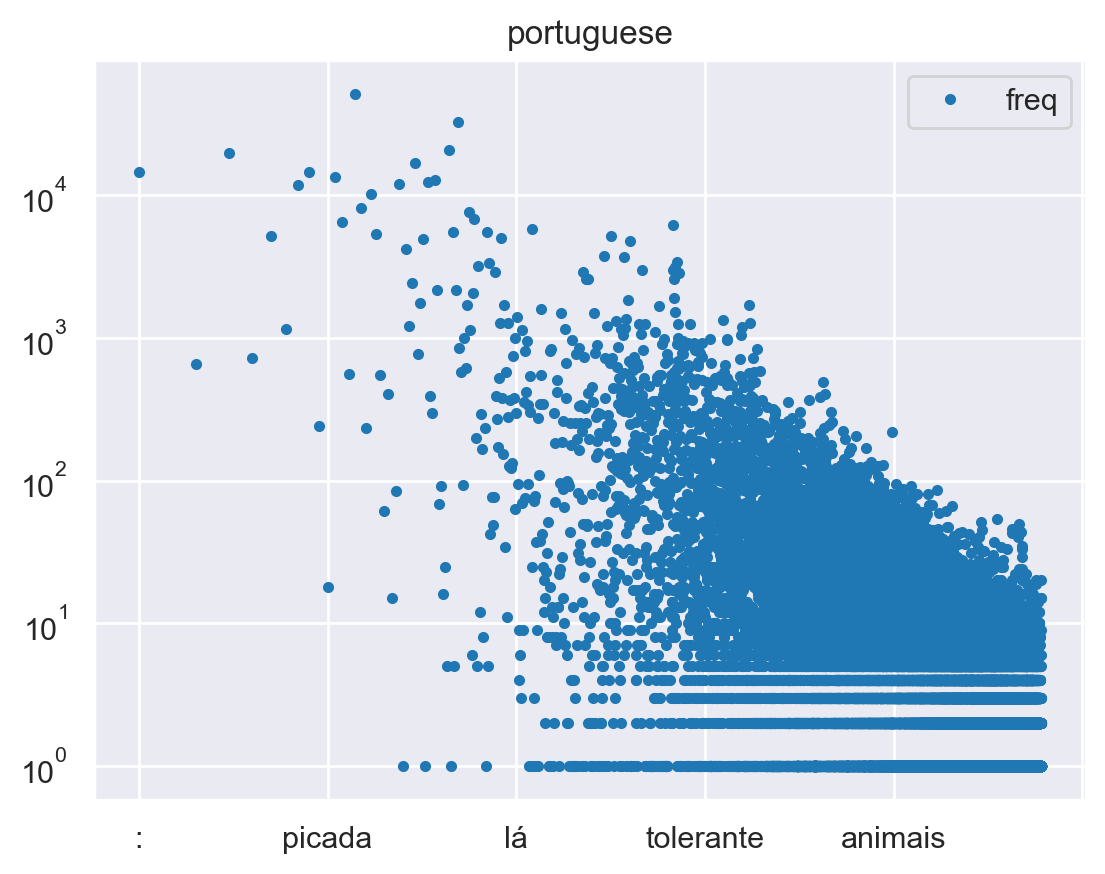

In [56]:
print('Tokens freq Log Plot')
for c, v in df.tokens.items():
    word_ctr = Counter(v)
    c_freq_df = pd.DataFrame.from_dict(word_ctr, orient="index", columns=["freq"])
    c_freq_df.plot(loglog=True, style='.')
    plt.title(c)
    plt.show()

In [57]:
all_token_freqs = {}
for c, v in len_freq_df.items():
    v_dict = {}
    for ki, vi in v.most_common():
        v_dict[ki] = vi
    all_token_freqs[c] = v_dict
all_token_freqs_df = pd.DataFrame(all_token_freqs)
all_token_freqs_df

,mythology,woodworking,robotics,hsm,health,portuguese
3,166898.0,256457.0,235938.0,219498.0,256817.0,110381.0
2,153910.0,228789.0,218484.0,246600.0,268598.0,146411.0
1,153309.0,212944.0,392526.0,272686.0,288045.0,232324.0
4,134176.0,240246.0,189724.0,173547.0,236943.0,81767.0
5,94334.0,147694.0,130509.0,119922.0,153374.0,80598.0
...,...,...,...,...,...,...
265,NaN,NaN,NaN,NaN,1.0,NaN
183,NaN,NaN,NaN,NaN,1.0,NaN
149,NaN,NaN,NaN,NaN,1.0,NaN
144,NaN,NaN,NaN,NaN,1.0,NaN


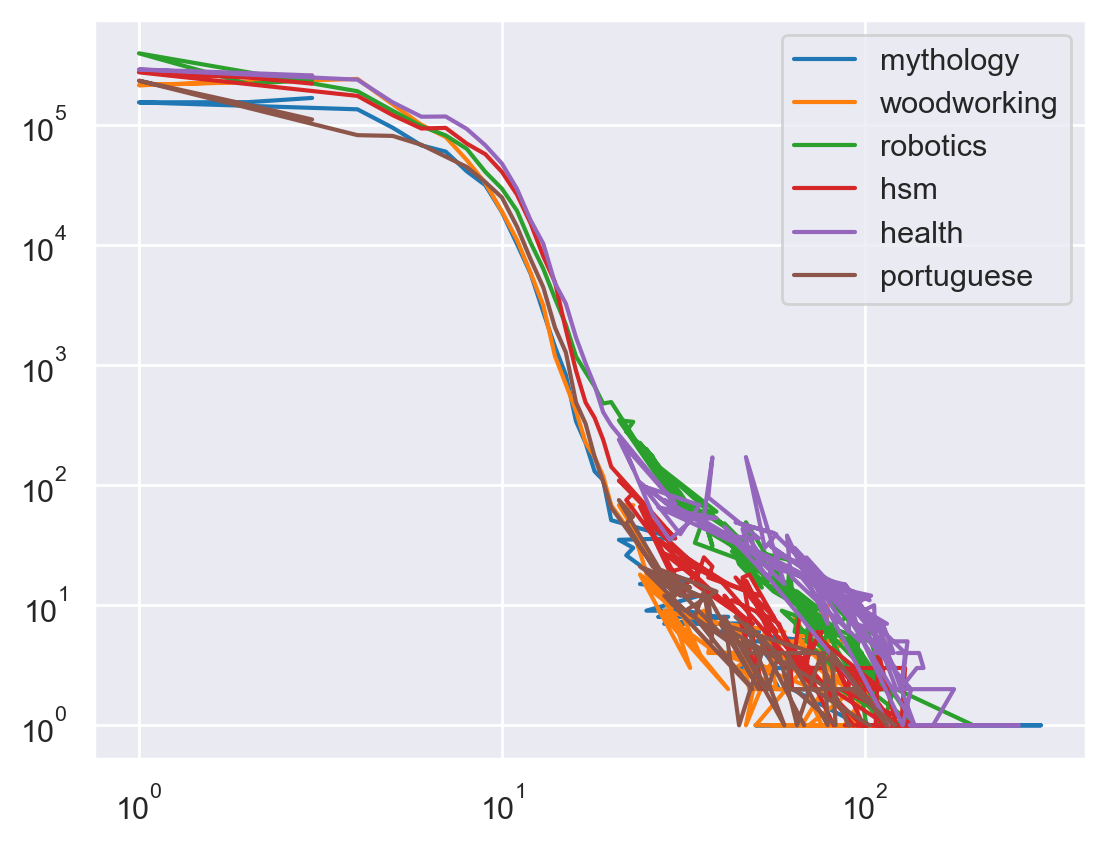

In [58]:
all_token_freqs_df.plot(loglog=True)
plt.show()

#### 🚧 TODO: Do length frequency follow Zipf's law?

Explain the graph results below and possibly fix them

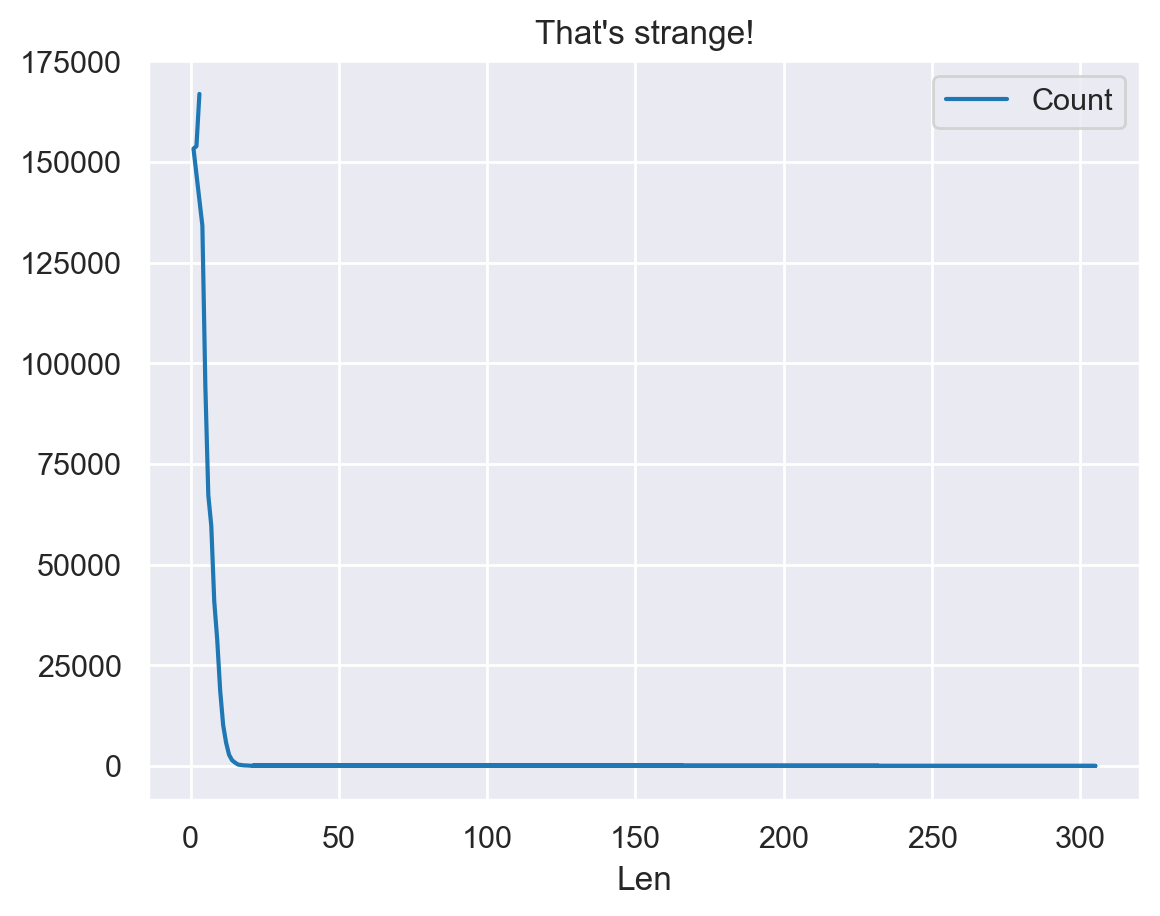

In [59]:
myth_len_freq_df.plot(title="That's strange!")
plt.show()

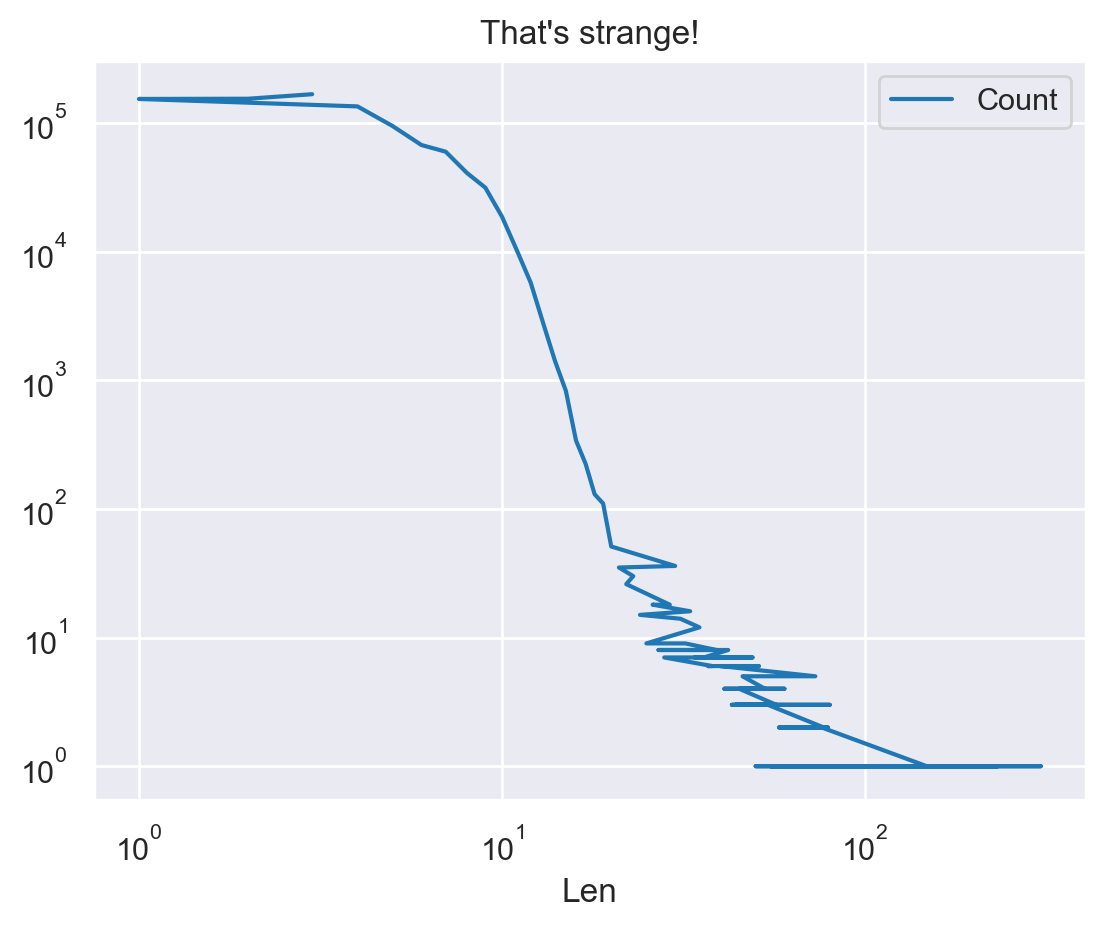

In [60]:
myth_len_freq_df.plot(title="That's strange!", loglog=True)
plt.show()

#### 🚧 TODO: How to compute richness in words? How to compute the type/token ratio? Who will win this time?

In [61]:
df["token_type_ratio"] = df['tokens_n'] / df['nr_types']
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,nr_types,avg_wordsize,token_type_ratio
corpus,,,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942599,51253,4.97,18.39
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390532,32318,4.84,43.03
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63,"[Q, :, How, is, this, torque, value, arrived, ...",1526904,53833,4.75,28.36
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50,"[Q, :, When, and, why, did, people, stopped, u...",1445136,62464,5.10,23.14
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714931,66006,5.33,25.98
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55,"[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907242,60282,4.87,15.05


<AxesSubplot:ylabel='corpus'>

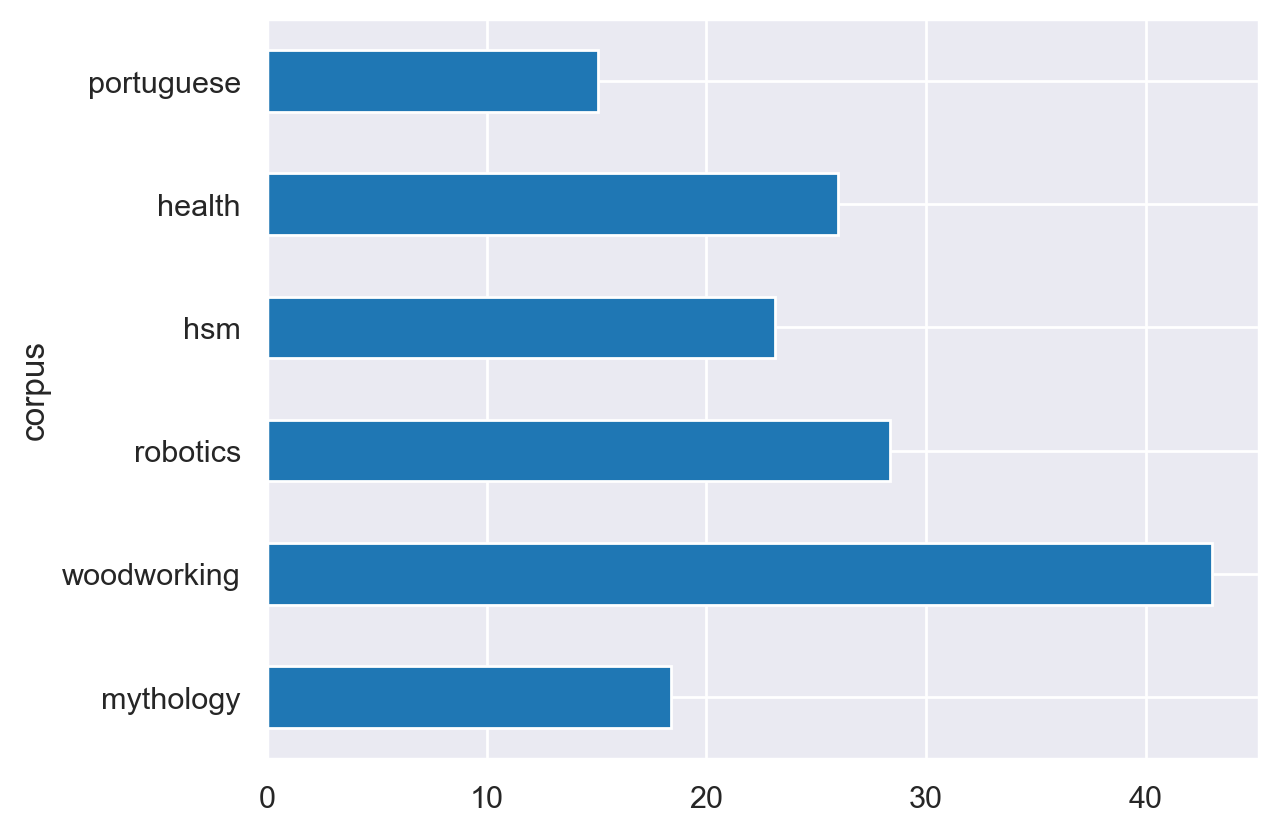

In [62]:
df["token_type_ratio"].plot.barh()

### What happened to Portuguese? Explain!

Make a type/token ration growth plot. Explain the obtained order!

In [63]:
word_types = df.tokens.progress_map(
    lambda x: batch_counts(x, max_len=df.tokens_n.min(), hop=10_000)
)

  0%|          | 0/6 [00:00<?, ?it/s]

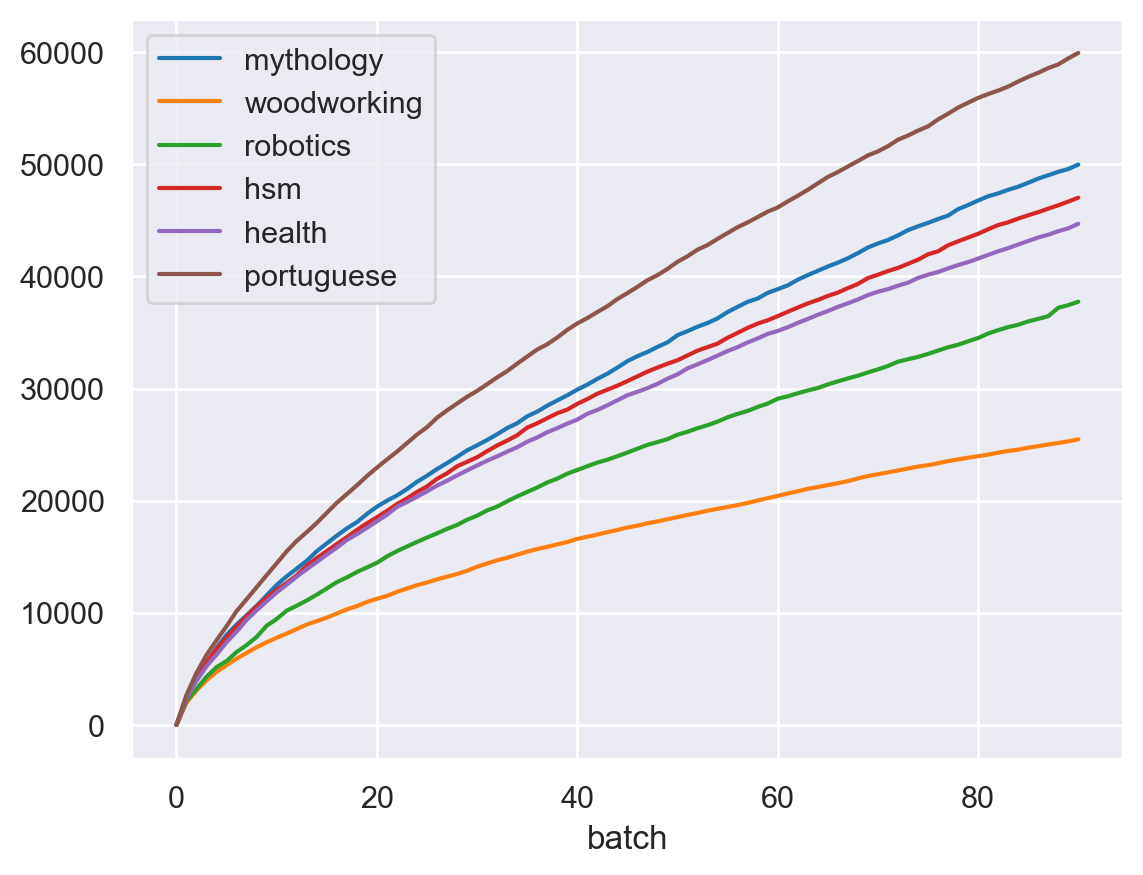

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,0,0,0,0,0,0
1,2534,1985,2140,2330,2403,2673
2,4169,3085,3200,4259,3923,4654
3,5532,3976,4295,5560,5236,6238
4,6860,4727,5157,6767,6273,7551
...,...,...,...,...,...,...
86,48720,24857,36206,45726,43468,58157
87,49021,25007,36451,46041,43714,58575
88,49325,25147,37199,46339,44032,58902


In [64]:
word_type_df = pd.DataFrame(dict(zip(word_types.index, word_types.values)))
word_type_df.index.name = "batch"
word_type_df.plot()
plt.show()

word_type_df

### Percentage of new words

In [65]:
word_type_tokens = {}
for c, text in tqdm(corpora.items()):
    tokens = word_tokenize(text)
    tokens_n = len(tokens)
    nr_types = len(set(tokens))
    word_type_tokens[c] = tokens_n / nr_types
word_type_tokens

  0%|          | 0/6 [00:00<?, ?it/s]

{'mythology': 18.391099057616138,
 'woodworking': 43.02654867256637,
 'robotics': 28.3637174223989,
 'hsm': 23.135502049180328,
 'health': 25.98144108111384,
 'portuguese': 15.049965163730468}

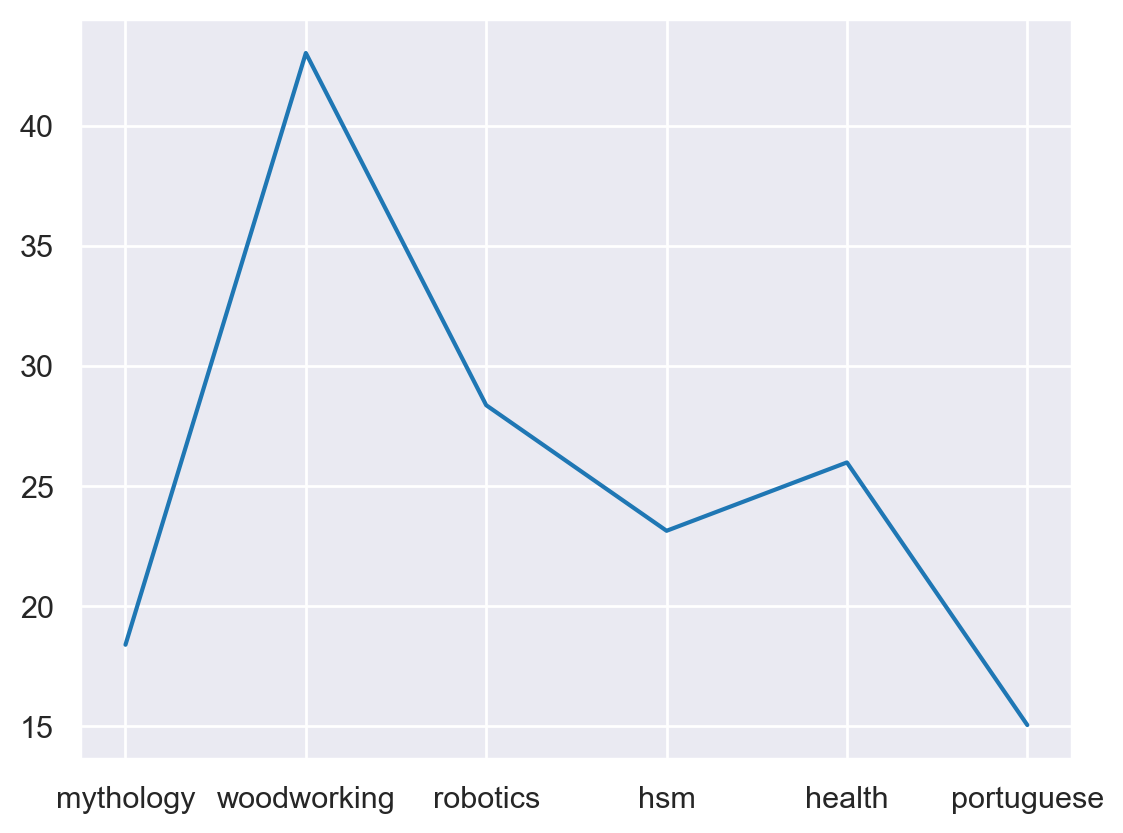

mythology      18.39
woodworking    43.03
robotics       28.36
hsm            23.14
health         25.98
portuguese     15.05
dtype: float64

In [66]:
word_type_token_df = pd.Series(word_type_tokens)
word_type_token_df.plot()
plt.show()

word_type_token_df

____